In [1]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
#import geopandas as gpd
from shapely.geometry import Point
import shapely
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.tsa.stattools as sm

/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
data = pd.read_excel('/Users/VarshiniSelvadurai/Documents/Internship/Crime_Edited.xlsx', sheet_name = '2017')
#data = pd.read_excel('C:\\Users\\vns8\\Documents\\Crime_Edited.xlsx', sheet_name = '2017')
data = data.loc[data["Crime Name1"] != "Not a Crime"]
data = data.drop(columns = ["Police District Number","Address Number","Victims","CR Number","NIBRS Code","Beat","PRA","State","Incident ID","Offence Code","Sector","Police District Name","Crime Name2","Crime Name3","Agency","Place","End Date/Time","Dispatch Date/Time","Block_Address"])
ugh = list(map(str, data["Start Time"]))
for i in range (0, len(ugh)):
    ugh[i] = ugh[i][:2]
data["Start Time"] = ugh
ugh = (list(map(str,data['Start Date'])))
ughh = []
for i in range(0,len(ugh)):
    ugh[i] = ugh[i][5:]
    ugh[i] = ugh[i][:5]
data['Start Date'] = ugh

In [3]:
z_20902 = data.loc[data["Zip Code"] == 20902]
z_20906 = data.loc[data["Zip Code"] == 20906]
z_20904 = data.loc[data["Zip Code"] == 20904]
z_20910 = data.loc[data["Zip Code"] == 20910]
z_20874 = data.loc[data["Zip Code"] == 20874]

In [101]:
print(data.head())

              Crime Name1          City   Zip Code Start Date/Time Start Date  \
0    Crime Against Person      ROCKVILLE     20852      2017-01-01      01-01   
1    Crime Against Person   GAITHERSBURG     20877      2017-01-01      01-01   
2  Crime Against Property       BETHESDA     20814      2017-01-01      01-01   
3  Crime Against Property       BETHESDA     20814      2017-01-01      01-01   
4  Crime Against Property  SILVER SPRING     20910      2017-01-01      01-01   

  Start Time Start Day   Latitude  Longitude  \
0         00    Sunday  39.028882 -77.104170   
1         00    Sunday  39.131962 -77.202171   
2         00    Sunday  38.988164 -77.096074   
3         00    Sunday  38.988912 -77.097367   
4         00    Sunday  39.015613 -77.055719   

                                    Location  
0  (39.028882456707592, -77.104169724353142)  
1  (39.131961823109656, -77.202170978179652)  
2  (38.988164310923018, -77.096074160000384)  
3    (38.988912432950457, -77.097366

# CASE 1

In [5]:
def case1(data, title):
    start_date = list(map(str, data['Start Date'].value_counts().keys().tolist()))
    start_date.sort()
    start_time = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
    start_time.sort()
    ugh = [0 for i in range(0,len(start_date)*len(start_time))]
    ughh = [0 for i in range(0,len(start_date)*len(start_time))]
    for index,row in data.iterrows():
        a = start_date.index(row["Start Date"])
        b = int(row["Start Time"])
        ugh[24*a + b] += 1
        ughh[24*a + b] = row["Start Date"] + row["Start Time"]
    march = pd.DataFrame({"Crime Frequency": ugh, "Date and Time":ughh} )
    temp = pd.read_excel('/Users/VarshiniSelvadurai/Documents/Internship/Crime_Edited.xlsx', sheet_name = '2017 - TEMP')
    #temp = pd.read_excel('C:\\Users\\vns8\\Documents\\Crime_Edited.xlsx', sheet_name = '2017 - TEMP')
    march["Temperature"] = temp["AVG"]
    ax = march.plot(kind = "line", y = ["Crime Frequency", "Temperature"], figsize = (15,5), title = ("2017" +str(title)), xticks = [i for i in range (0,336,24)], grid = True, legend = True)
    ax.set_xlabel("Day of the Year")
    fig = ax.get_figure()
    fig.savefig("2017"+str(title)+".png")
    return march

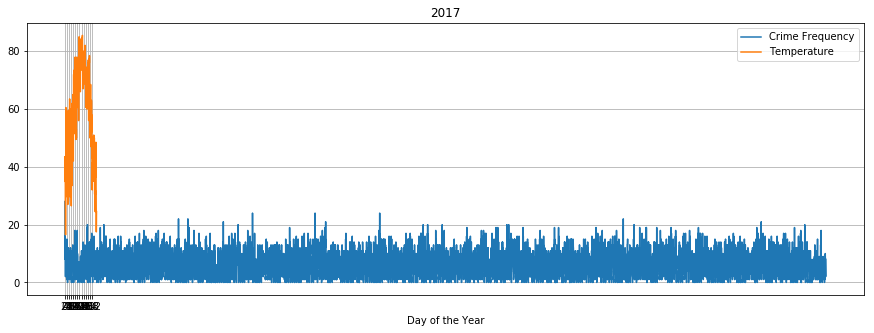

In [6]:
hour_data = case1(data,"")

In [ ]:
print(hour_data)

### ARIMA

##### Not super sure what the results mean...

                             ARIMA Model Results                              
Dep. Variable:          D.Crime Count   No. Observations:                 8759
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -23853.028
Method:                       css-mle   S.D. of innovations              3.685
Date:                Tue, 14 Aug 2018   AIC                          47712.056
Time:                        19:27:18   BIC                          47733.290
Sample:                             1   HQIC                         47719.291
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0018      0.027     -0.066      0.947      -0.055       0.051
ar.L1.D.Crime Count    -0.4604      0.010    -48.449      0.000      -0.479      -0.442
                

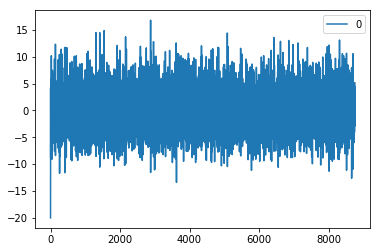

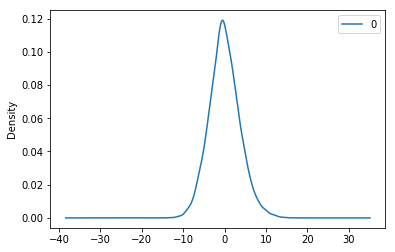

                 0
count  8759.000000
mean     -0.001051
std       3.686658
min     -19.998220
25%      -2.378454
50%      -0.155998
75%       2.304353
max      16.764704


In [6]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(hour_data["Crime Count"], order=(1,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

### Power Spectrum - Periodogram

##### IT WORKS: at least im assuming it does cause the period is 24 hours... 

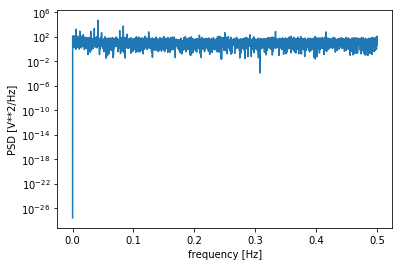

Max Frequency: 0.041666666666666664 Hz
Period = 1/ Frequency: 24.0 hours


In [7]:
from scipy import signal
f, Pxx_den = signal.periodogram(hour_data["Crime Count"])
plt.semilogy(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()
max_frequency = (f[list(Pxx_den).index(max(Pxx_den))])
print("Max Frequency:", max_frequency, "Hz")
print("Period = 1/ Frequency: " + str(1/max_frequency) + " hours")

### Seasonal Decomposition

##### additive vs. multiplicative: neither works

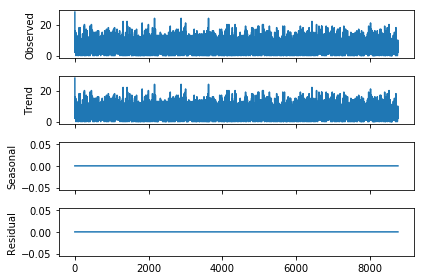

ValueError: Multiplicative seasonality is not appropriate for zero and negative values

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(hour_data["Crime Count"], model='additive', freq=1)
result.plot()
plt.show()

result = seasonal_decompose(hour_data["Crime Count"], model='multiplicative', freq=1)
result.plot()
plt.show()

### Autocorrelation Plot

##### shows that the best lag against itself is 1 (obvious) --> not sure how it relates to seasonality

/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


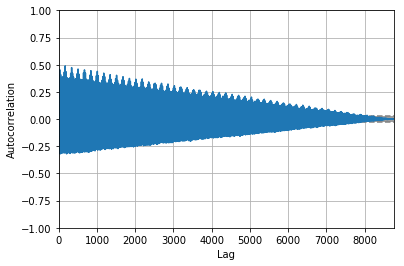

In [8]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(hour_data["Crime Count"])
#shows that optimal lag is 0

### Seasonal Subseries Plot

##### Can show an overall trend (usefull to see increase in weekends) but not sure how to do this in python (i don't think there is a function for this)

### Boxplot

##### If you look at the medians in the boxplot you can see a general trend...this works the same and the seasonal subseries but figuring out how to do that might be more effective

{'whiskers': [<matplotlib.lines.Line2D at 0x1c144fbcc0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c144e15c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c144fbb70>,
 'medians': [<matplotlib.lines.Line2D at 0x1c144e1e10>,
 'fliers': [<matplotlib.lines.Line2D at 0x1c144e3278>,
 'means': []}

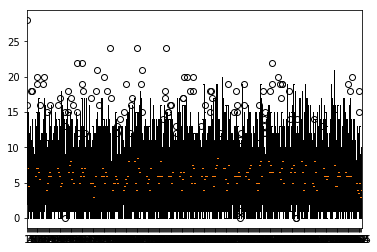

<Figure size 1440x720 with 0 Axes>

In [9]:
fig, ax = plt.subplots()
plt.figure(figsize = (20,10))
# h = [list(hour_data["Crime Count"])[0:24],
#     list(hour_data["Crime Count"])[24:48],
#     list(hour_data["Crime Count"])[48:72],
#     list(hour_data["Crime Count"])[72:96],
#     list(hour_data["Crime Count"])[96:120],
#     list(hour_data["Crime Count"])[120:144],
#     list(hour_data["Crime Count"])[144:168],
#     list(hour_data["Crime Count"])[168:192],
#     list(hour_data["Crime Count"])[192:216],
#     list(hour_data["Crime Count"])[216:240],
#     list(hour_data["Crime Count"])[240:264],
#     list(hour_data["Crime Count"])[264:288],
#     list(hour_data["Crime Count"])[288:2312],
#     list(hour_data["Crime Count"])[312:336]]

h = []
for i in range(0,365*24,24):
    h.append(list(hour_data["Crime Count"])[i:i+24])
ax.boxplot(h)

# CASE 2 

In [16]:
def case2(data, title):
    start_date = list(map(str, data['Start Date'].value_counts().keys().tolist()))
    if (len(start_date)!=365):
        start_date.append("04-23")
    start_date.sort()
    ugh = [0 for i in range(0,len(start_date))]
    ughh = [0 for i in range(0,len(start_date))]
    for index,row in data.iterrows():
        a = start_date.index(row["Start Date"])
        ugh[a] += 1
    march = pd.DataFrame({"Crime Count": ugh, "Date":start_date} )
    ax = march.plot(kind = "line", y = "Crime Count", figsize = (40,10), title = ("2017" +str(title)), xticks = [0,31,59,90,120,151,181,212,243,273,304,334,365], grid = True)
    fig = ax.get_figure()
    fig.savefig("2017" + title + ".png")
    return march

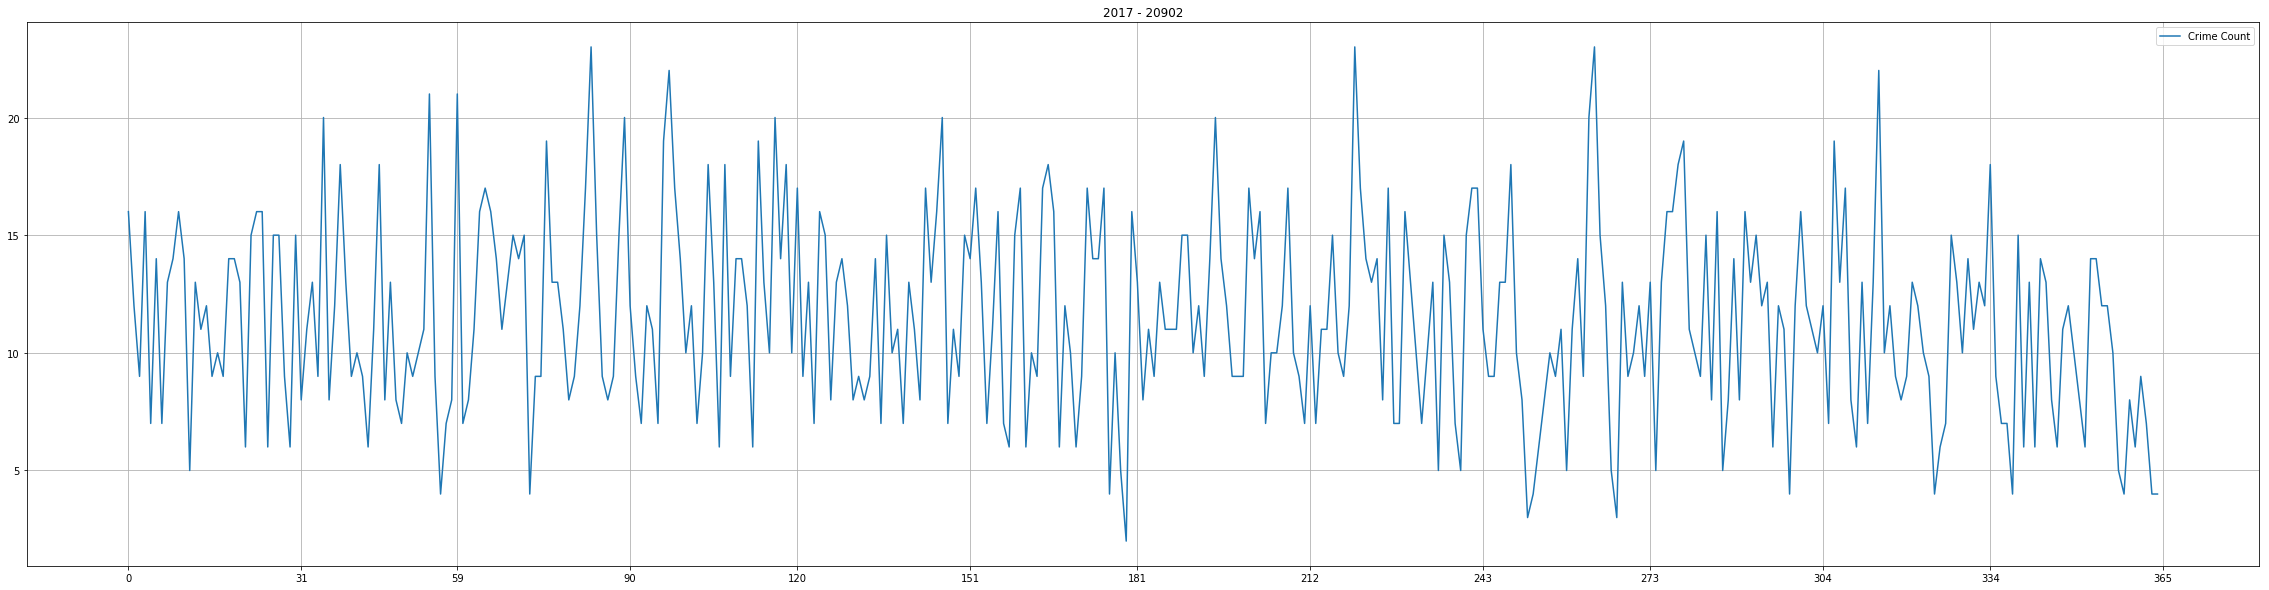

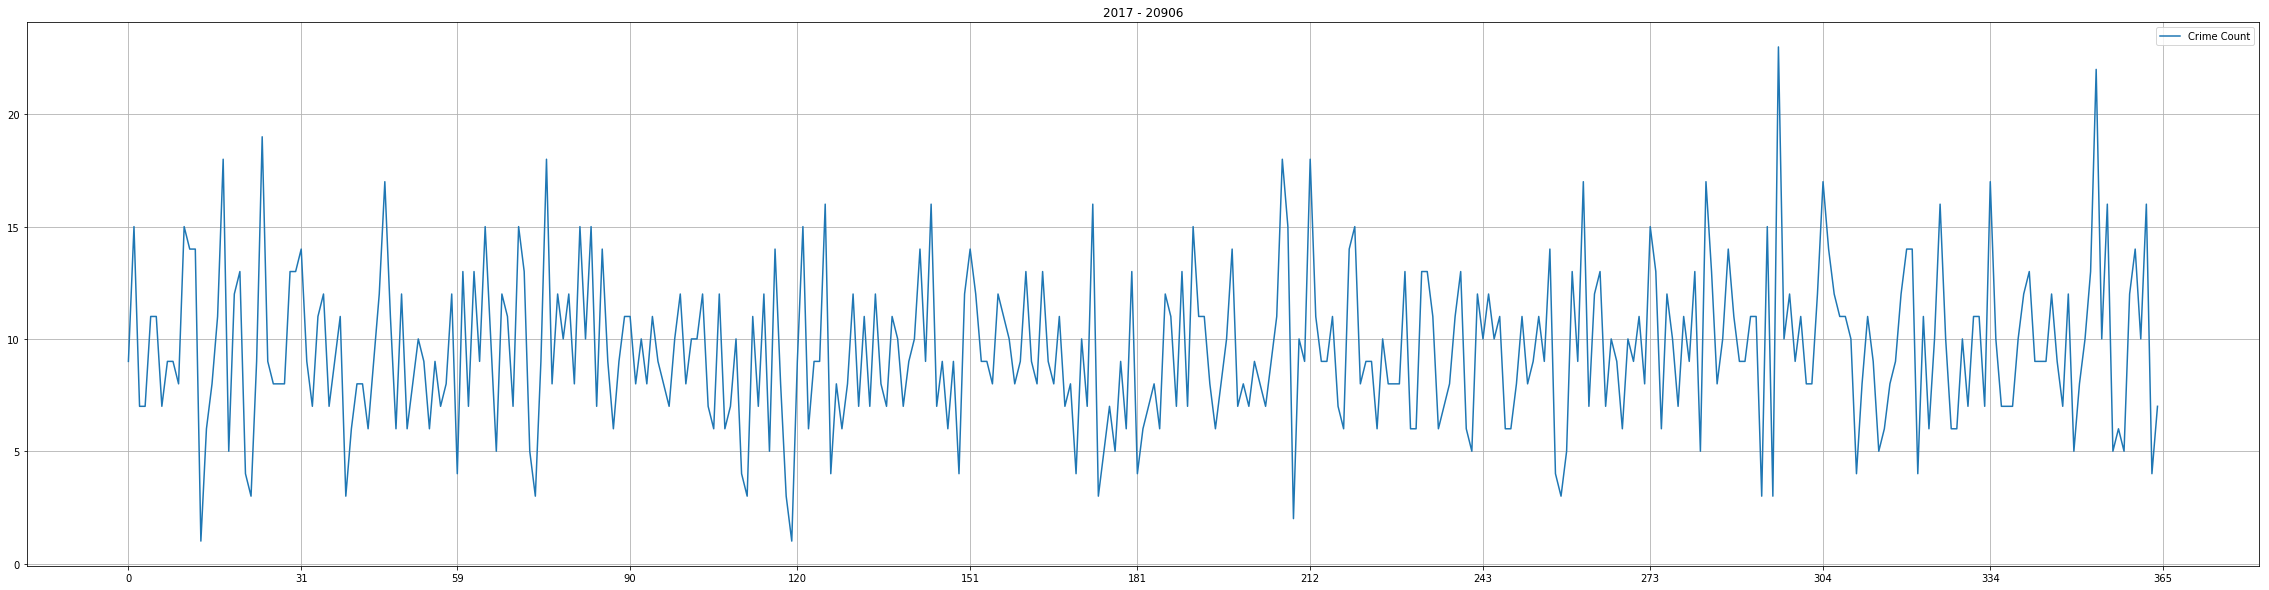

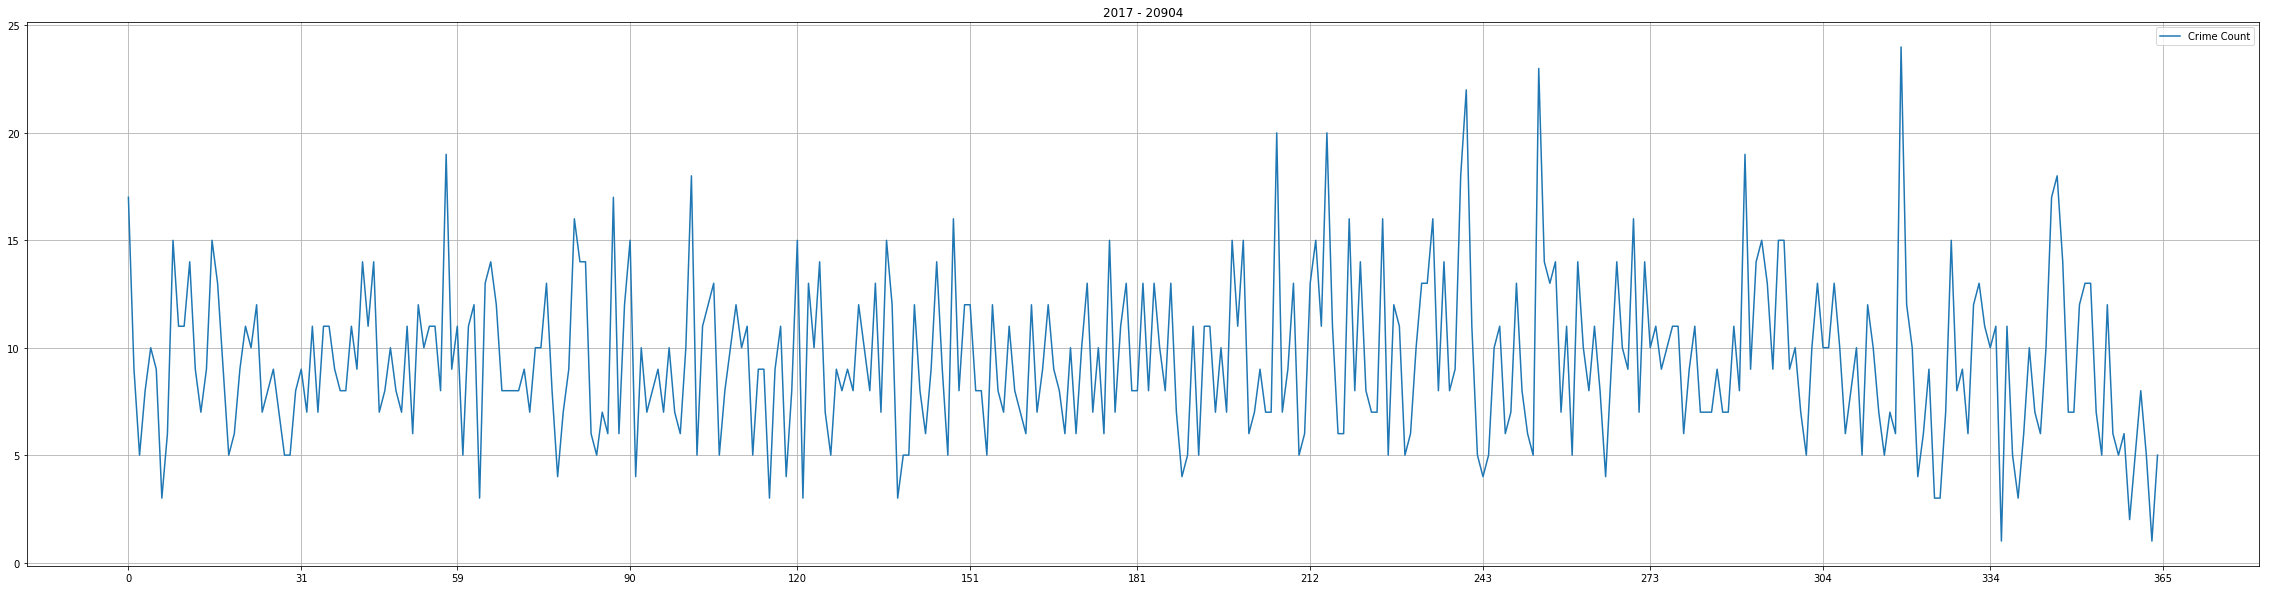

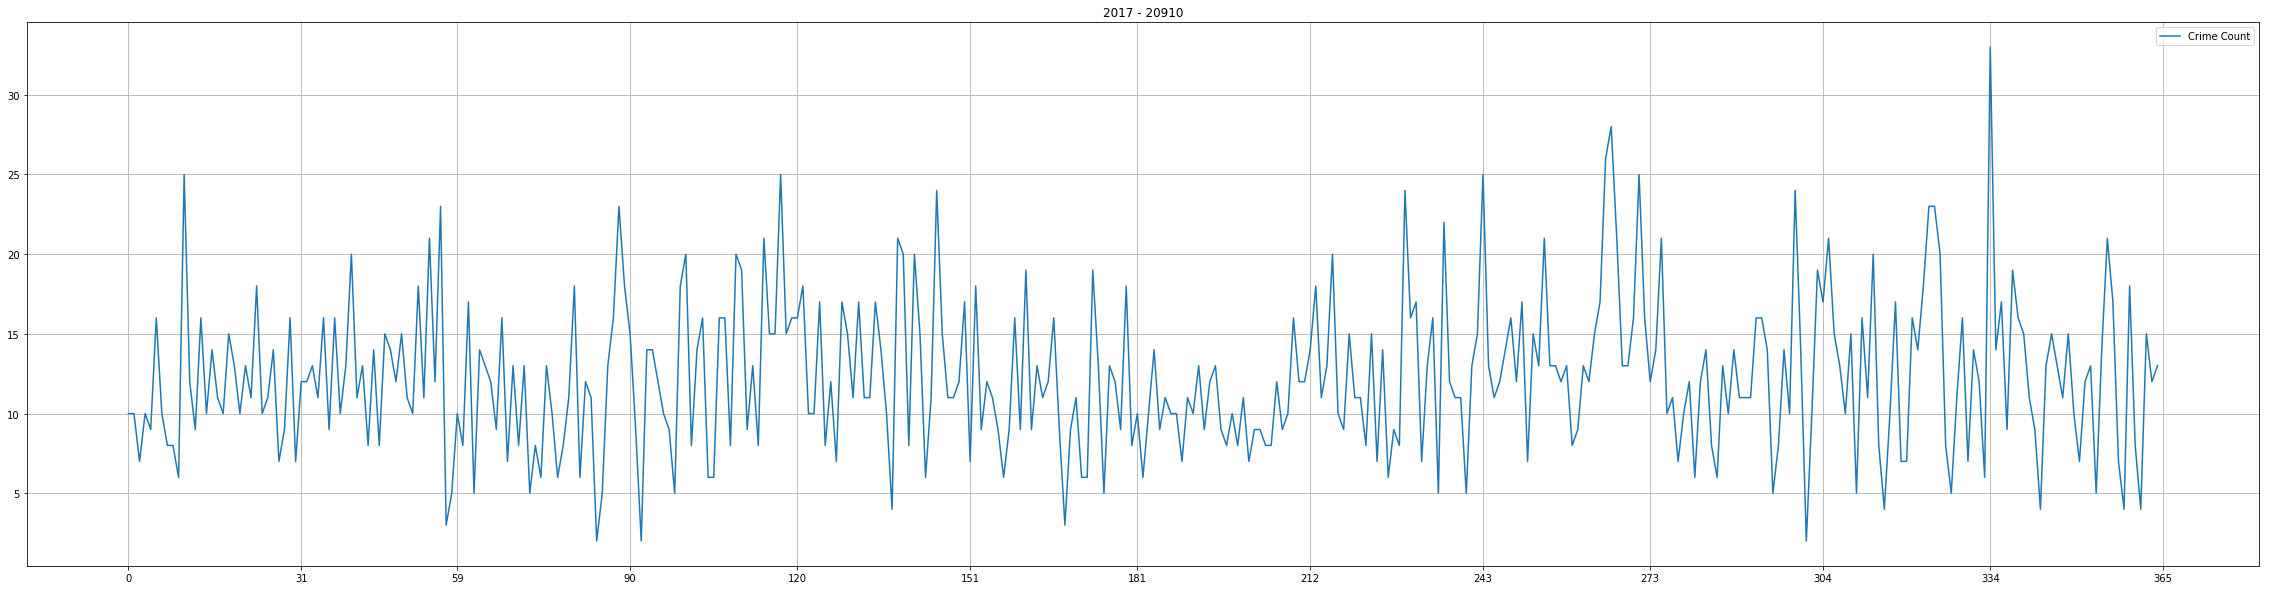

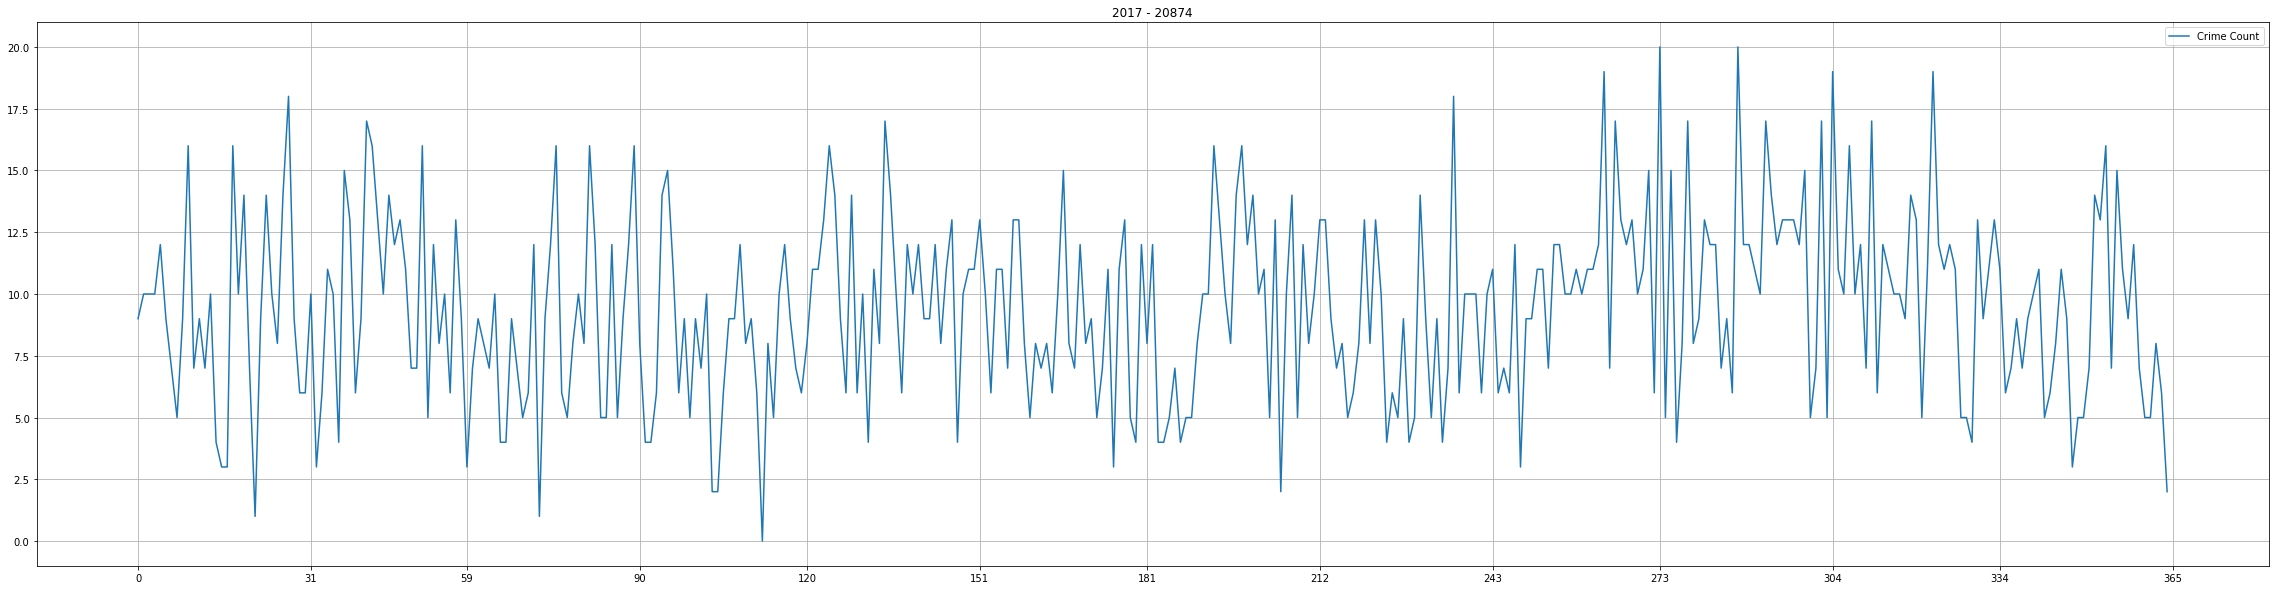

In [17]:
day_20902 = case2(z_20902, " - 20902")
day_20906 = case2(z_20906, " - 20906")
day_20904 = case2(z_20904, " - 20904")
day_20910 = case2(z_20910, " - 20910")
day_20874 = case2(z_20874, " - 20874")

In [12]:
zipcodes = [day_20902,day_20904,day_20906,day_20910,day_20874]
names = ["20902","20904","20906","20910","20874"]
i = 0
j = 0
for z in zipcodes:
    for z2 in zipcodes:
        if i!=j:
            x = np.column_stack((list(z["Crime Count"]),list(z2["Crime Count"])))
            print(names[i])
            print(names[j])
            sm.grangercausalitytests(x = x,maxlag = 121)
            print()
        j += 1
    j = 0
    i += 1

20902
20904

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.2989  , p=0.0388  , df_denom=361, df_num=1
ssr based chi2 test:   chi2=4.3346  , p=0.0373  , df=1
likelihood ratio test: chi2=4.3090  , p=0.0379  , df=1
parameter F test:         F=4.2989  , p=0.0388  , df_denom=361, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.3073  , p=0.0020  , df_denom=358, df_num=2
ssr based chi2 test:   chi2=12.7908 , p=0.0017  , df=2
likelihood ratio test: chi2=12.5706 , p=0.0019  , df=2
parameter F test:         F=6.3073  , p=0.0020  , df_denom=358, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.8157  , p=0.0103  , df_denom=355, df_num=3
ssr based chi2 test:   chi2=11.6729 , p=0.0086  , df=3
likelihood ratio test: chi2=11.4886 , p=0.0094  , df=3
parameter F test:         F=3.8157  , p=0.0103  , df_denom=355, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.9184  

ssr based F test:         F=1.8376  , p=0.0042  , df_denom=259, df_num=35
ssr based chi2 test:   chi2=81.9485 , p=0.0000  , df=35
likelihood ratio test: chi2=73.1958 , p=0.0002  , df=35
parameter F test:         F=1.8376  , p=0.0042  , df_denom=259, df_num=35

Granger Causality
number of lags (no zero) 36
ssr based F test:         F=1.8827  , p=0.0028  , df_denom=256, df_num=36
ssr based chi2 test:   chi2=87.1058 , p=0.0000  , df=36
likelihood ratio test: chi2=77.2761 , p=0.0001  , df=36
parameter F test:         F=1.8827  , p=0.0028  , df_denom=256, df_num=36

Granger Causality
number of lags (no zero) 37
ssr based F test:         F=1.7829  , p=0.0054  , df_denom=253, df_num=37
ssr based chi2 test:   chi2=85.5240 , p=0.0000  , df=37
likelihood ratio test: chi2=75.9982 , p=0.0002  , df=37
parameter F test:         F=1.7829  , p=0.0054  , df_denom=253, df_num=37

Granger Causality
number of lags (no zero) 38
ssr based F test:         F=1.7022  , p=0.0092  , df_denom=250, df_num=38
ssr b

ssr based F test:         F=1.3362  , p=0.0725  , df_denom=172, df_num=64
ssr based chi2 test:   chi2=149.6573, p=0.0000  , df=64
likelihood ratio test: chi2=121.4826, p=0.0000  , df=64
parameter F test:         F=1.3362  , p=0.0725  , df_denom=172, df_num=64

Granger Causality
number of lags (no zero) 65
ssr based F test:         F=1.2740  , p=0.1110  , df_denom=169, df_num=65
ssr based chi2 test:   chi2=146.9952, p=0.0000  , df=65
likelihood ratio test: chi2=119.6296, p=0.0000  , df=65
parameter F test:         F=1.2740  , p=0.1110  , df_denom=169, df_num=65

Granger Causality
number of lags (no zero) 66
ssr based F test:         F=1.2471  , p=0.1321  , df_denom=166, df_num=66
ssr based chi2 test:   chi2=148.2518, p=0.0000  , df=66
likelihood ratio test: chi2=120.4008, p=0.0000  , df=66
parameter F test:         F=1.2471  , p=0.1321  , df_denom=166, df_num=66

Granger Causality
number of lags (no zero) 67
ssr based F test:         F=1.2338  , p=0.1436  , df_denom=163, df_num=67
ssr b

ssr based F test:         F=0.8112  , p=0.8372  , df_denom=82, df_num=94
ssr based chi2 test:   chi2=251.9923, p=0.0000  , df=94
likelihood ratio test: chi2=178.1684, p=0.0000  , df=94
parameter F test:         F=0.8112  , p=0.8372  , df_denom=82, df_num=94

Granger Causality
number of lags (no zero) 95
ssr based F test:         F=0.8440  , p=0.7863  , df_denom=79, df_num=95
ssr based chi2 test:   chi2=274.0200, p=0.0000  , df=95
likelihood ratio test: chi2=189.1523, p=0.0000  , df=95
parameter F test:         F=0.8440  , p=0.7863  , df_denom=79, df_num=95

Granger Causality
number of lags (no zero) 96
ssr based F test:         F=0.8224  , p=0.8183  , df_denom=76, df_num=96
ssr based chi2 test:   chi2=279.4466, p=0.0000  , df=96
likelihood ratio test: chi2=191.6298, p=0.0000  , df=96
parameter F test:         F=0.8224  , p=0.8183  , df_denom=76, df_num=96

Granger Causality
number of lags (no zero) 97
ssr based F test:         F=0.7792  , p=0.8751  , df_denom=73, df_num=97
ssr based ch

20906

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2155  , p=0.6428  , df_denom=361, df_num=1
ssr based chi2 test:   chi2=0.2173  , p=0.6411  , df=1
likelihood ratio test: chi2=0.2172  , p=0.6411  , df=1
parameter F test:         F=0.2155  , p=0.6428  , df_denom=361, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1415  , p=0.3205  , df_denom=358, df_num=2
ssr based chi2 test:   chi2=2.3148  , p=0.3143  , df=2
likelihood ratio test: chi2=2.3075  , p=0.3155  , df=2
parameter F test:         F=1.1415  , p=0.3205  , df_denom=358, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.7724  , p=0.5101  , df_denom=355, df_num=3
ssr based chi2 test:   chi2=2.3629  , p=0.5006  , df=3
likelihood ratio test: chi2=2.3552  , p=0.5020  , df=3
parameter F test:         F=0.7724  , p=0.5101  , df_denom=355, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.4451  , p=0.

likelihood ratio test: chi2=83.3564 , p=0.0000  , df=38
parameter F test:         F=1.9102  , p=0.0019  , df_denom=250, df_num=38

Granger Causality
number of lags (no zero) 39
ssr based F test:         F=1.8431  , p=0.0030  , df_denom=247, df_num=39
ssr based chi2 test:   chi2=94.8721 , p=0.0000  , df=39
likelihood ratio test: chi2=83.2707 , p=0.0000  , df=39
parameter F test:         F=1.8431  , p=0.0030  , df_denom=247, df_num=39

Granger Causality
number of lags (no zero) 40
ssr based F test:         F=1.8742  , p=0.0022  , df_denom=244, df_num=40
ssr based chi2 test:   chi2=99.8558 , p=0.0000  , df=40
likelihood ratio test: chi2=87.0755 , p=0.0000  , df=40
parameter F test:         F=1.8742  , p=0.0022  , df_denom=244, df_num=40

Granger Causality
number of lags (no zero) 41
ssr based F test:         F=2.0210  , p=0.0006  , df_denom=241, df_num=41
ssr based chi2 test:   chi2=111.3961, p=0.0000  , df=41
likelihood ratio test: chi2=95.7461 , p=0.0000  , df=41
parameter F test:      

likelihood ratio test: chi2=145.8466, p=0.0000  , df=69
parameter F test:         F=1.4489  , p=0.0302  , df_denom=157, df_num=69

Granger Causality
number of lags (no zero) 70
ssr based F test:         F=1.4053  , p=0.0425  , df_denom=154, df_num=70
ssr based chi2 test:   chi2=188.4315, p=0.0000  , df=70
likelihood ratio test: chi2=145.7106, p=0.0000  , df=70
parameter F test:         F=1.4053  , p=0.0425  , df_denom=154, df_num=70

Granger Causality
number of lags (no zero) 71
ssr based F test:         F=1.3692  , p=0.0558  , df_denom=151, df_num=71
ssr based chi2 test:   chi2=189.2735, p=0.0000  , df=71
likelihood ratio test: chi2=146.1189, p=0.0000  , df=71
parameter F test:         F=1.3692  , p=0.0558  , df_denom=151, df_num=71

Granger Causality
number of lags (no zero) 72
ssr based F test:         F=1.3566  , p=0.0612  , df_denom=148, df_num=72
ssr based chi2 test:   chi2=193.3639, p=0.0000  , df=72
likelihood ratio test: chi2=148.4879, p=0.0000  , df=72
parameter F test:      

ssr based F test:         F=1.1919  , p=0.2302  , df_denom=61, df_num=101
ssr based chi2 test:   chi2=520.9995, p=0.0000  , df=101
likelihood ratio test: chi2=287.6898, p=0.0000  , df=101
parameter F test:         F=1.1919  , p=0.2302  , df_denom=61, df_num=101

Granger Causality
number of lags (no zero) 102
ssr based F test:         F=1.1648  , p=0.2651  , df_denom=58, df_num=102
ssr based chi2 test:   chi2=538.7586, p=0.0000  , df=102
likelihood ratio test: chi2=293.1539, p=0.0000  , df=102
parameter F test:         F=1.1648  , p=0.2651  , df_denom=58, df_num=102

Granger Causality
number of lags (no zero) 103
ssr based F test:         F=1.1171  , p=0.3297  , df_denom=55, df_num=103
ssr based chi2 test:   chi2=548.1159, p=0.0000  , df=103
likelihood ratio test: chi2=295.7542, p=0.0000  , df=103
parameter F test:         F=1.1171  , p=0.3297  , df_denom=55, df_num=103

Granger Causality
number of lags (no zero) 104
ssr based F test:         F=1.0435  , p=0.4405  , df_denom=52, df_num=

ssr based F test:         F=2.3166  , p=0.0025  , df_denom=313, df_num=17
ssr based chi2 test:   chi2=43.7851 , p=0.0004  , df=17
likelihood ratio test: chi2=41.2418 , p=0.0009  , df=17
parameter F test:         F=2.3166  , p=0.0025  , df_denom=313, df_num=17

Granger Causality
number of lags (no zero) 18
ssr based F test:         F=2.2611  , p=0.0027  , df_denom=310, df_num=18
ssr based chi2 test:   chi2=45.5567 , p=0.0003  , df=18
likelihood ratio test: chi2=42.8046 , p=0.0009  , df=18
parameter F test:         F=2.2611  , p=0.0027  , df_denom=310, df_num=18

Granger Causality
number of lags (no zero) 19
ssr based F test:         F=2.0944  , p=0.0052  , df_denom=307, df_num=19
ssr based chi2 test:   chi2=44.8486 , p=0.0007  , df=19
likelihood ratio test: chi2=42.1710 , p=0.0017  , df=19
parameter F test:         F=2.0944  , p=0.0052  , df_denom=307, df_num=19

Granger Causality
number of lags (no zero) 20
ssr based F test:         F=2.0528  , p=0.0056  , df_denom=304, df_num=20
ssr b

ssr based F test:         F=1.8772  , p=0.0011  , df_denom=214, df_num=50
ssr based chi2 test:   chi2=138.1573, p=0.0000  , df=50
likelihood ratio test: chi2=114.5550, p=0.0000  , df=50
parameter F test:         F=1.8772  , p=0.0011  , df_denom=214, df_num=50

Granger Causality
number of lags (no zero) 51
ssr based F test:         F=1.8156  , p=0.0019  , df_denom=211, df_num=51
ssr based chi2 test:   chi2=137.7965, p=0.0000  , df=51
likelihood ratio test: chi2=114.2454, p=0.0000  , df=51
parameter F test:         F=1.8156  , p=0.0019  , df_denom=211, df_num=51

Granger Causality
number of lags (no zero) 52
ssr based F test:         F=1.7552  , p=0.0030  , df_denom=208, df_num=52
ssr based chi2 test:   chi2=137.3432, p=0.0000  , df=52
likelihood ratio test: chi2=113.8715, p=0.0000  , df=52
parameter F test:         F=1.7552  , p=0.0030  , df_denom=208, df_num=52

Granger Causality
number of lags (no zero) 53
ssr based F test:         F=1.7403  , p=0.0033  , df_denom=205, df_num=53
ssr b

ssr based F test:         F=1.0596  , p=0.3840  , df_denom=115, df_num=83
ssr based chi2 test:   chi2=215.6669, p=0.0000  , df=83
likelihood ratio test: chi2=160.1828, p=0.0000  , df=83
parameter F test:         F=1.0596  , p=0.3840  , df_denom=115, df_num=83

Granger Causality
number of lags (no zero) 84
ssr based F test:         F=1.0356  , p=0.4284  , df_denom=112, df_num=84
ssr based chi2 test:   chi2=218.2422, p=0.0000  , df=84
likelihood ratio test: chi2=161.5010, p=0.0000  , df=84
parameter F test:         F=1.0356  , p=0.4284  , df_denom=112, df_num=84

Granger Causality
number of lags (no zero) 85
ssr based F test:         F=0.9975  , p=0.5015  , df_denom=109, df_num=85
ssr based chi2 test:   chi2=217.8017, p=0.0000  , df=85
likelihood ratio test: chi2=161.1154, p=0.0000  , df=85
parameter F test:         F=0.9975  , p=0.5015  , df_denom=109, df_num=85

Granger Causality
number of lags (no zero) 86
ssr based F test:         F=0.9763  , p=0.5436  , df_denom=106, df_num=86
ssr b

ssr based F test:         F=0.8202  , p=0.7745  , df_denom=31, df_num=111
ssr based chi2 test:   chi2=745.9590, p=0.0000  , df=111
likelihood ratio test: chi2=348.0765, p=0.0000  , df=111
parameter F test:         F=0.8202  , p=0.7745  , df_denom=31, df_num=111

Granger Causality
number of lags (no zero) 112
ssr based F test:         F=0.8800  , p=0.6884  , df_denom=28, df_num=112
ssr based chi2 test:   chi2=890.5700, p=0.0000  , df=112
likelihood ratio test: chi2=381.6557, p=0.0000  , df=112
parameter F test:         F=0.8800  , p=0.6884  , df_denom=28, df_num=112

Granger Causality
number of lags (no zero) 113
ssr based F test:         F=0.7969  , p=0.7902  , df_denom=25, df_num=113
ssr based chi2 test:   chi2=907.6568, p=0.0000  , df=113
likelihood ratio test: chi2=384.6655, p=0.0000  , df=113
parameter F test:         F=0.7969  , p=0.7902  , df_denom=25, df_num=113

Granger Causality
number of lags (no zero) 114
ssr based F test:         F=0.7638  , p=0.8195  , df_denom=22, df_num=

ssr based F test:         F=1.5738  , p=0.0430  , df_denom=289, df_num=25
ssr based chi2 test:   chi2=46.2871 , p=0.0059  , df=25
likelihood ratio test: chi2=43.3960 , p=0.0127  , df=25
parameter F test:         F=1.5738  , p=0.0430  , df_denom=289, df_num=25

Granger Causality
number of lags (no zero) 26
ssr based F test:         F=1.7941  , p=0.0118  , df_denom=286, df_num=26
ssr based chi2 test:   chi2=55.2897 , p=0.0007  , df=26
likelihood ratio test: chi2=51.2180 , p=0.0022  , df=26
parameter F test:         F=1.7941  , p=0.0118  , df_denom=286, df_num=26

Granger Causality
number of lags (no zero) 27
ssr based F test:         F=1.7030  , p=0.0186  , df_denom=283, df_num=27
ssr based chi2 test:   chi2=54.9165 , p=0.0012  , df=27
likelihood ratio test: chi2=50.8863 , p=0.0036  , df=27
parameter F test:         F=1.7030  , p=0.0186  , df_denom=283, df_num=27

Granger Causality
number of lags (no zero) 28
ssr based F test:         F=1.5633  , p=0.0387  , df_denom=280, df_num=28
ssr b

ssr based F test:         F=1.1870  , p=0.1953  , df_denom=187, df_num=59
ssr based chi2 test:   chi2=114.6027, p=0.0000  , df=59
likelihood ratio test: chi2=97.3397 , p=0.0012  , df=59
parameter F test:         F=1.1870  , p=0.1953  , df_denom=187, df_num=59

Granger Causality
number of lags (no zero) 60
ssr based F test:         F=1.1591  , p=0.2282  , df_denom=184, df_num=60
ssr based chi2 test:   chi2=115.2796, p=0.0000  , df=60
likelihood ratio test: chi2=97.7856 , p=0.0015  , df=60
parameter F test:         F=1.1591  , p=0.2282  , df_denom=184, df_num=60

Granger Causality
number of lags (no zero) 61
ssr based F test:         F=1.1445  , p=0.2467  , df_denom=181, df_num=61
ssr based chi2 test:   chi2=117.2625, p=0.0000  , df=61
likelihood ratio test: chi2=99.1735 , p=0.0015  , df=61
parameter F test:         F=1.1445  , p=0.2467  , df_denom=181, df_num=61

Granger Causality
number of lags (no zero) 62
ssr based F test:         F=1.1088  , p=0.2974  , df_denom=178, df_num=62
ssr b

ssr based F test:         F=0.8634  , p=0.7589  , df_denom=100, df_num=88
ssr based chi2 test:   chi2=210.4708, p=0.0000  , df=88
likelihood ratio test: chi2=156.5639, p=0.0000  , df=88
parameter F test:         F=0.8634  , p=0.7589  , df_denom=100, df_num=88

Granger Causality
number of lags (no zero) 89
ssr based F test:         F=0.8708  , p=0.7456  , df_denom=97, df_num=89
ssr based chi2 test:   chi2=220.5170, p=0.0000  , df=89
likelihood ratio test: chi2=162.0719, p=0.0000  , df=89
parameter F test:         F=0.8708  , p=0.7456  , df_denom=97, df_num=89

Granger Causality
number of lags (no zero) 90
ssr based F test:         F=0.8497  , p=0.7813  , df_denom=94, df_num=90
ssr based chi2 test:   chi2=223.7211, p=0.0000  , df=90
likelihood ratio test: chi2=163.7009, p=0.0000  , df=90
parameter F test:         F=0.8497  , p=0.7813  , df_denom=94, df_num=90

Granger Causality
number of lags (no zero) 91
ssr based F test:         F=0.8203  , p=0.8268  , df_denom=91, df_num=91
ssr based 

parameter F test:         F=0.7980  , p=0.7484  , df_denom=13, df_num=117

Granger Causality
number of lags (no zero) 118
ssr based F test:         F=0.6824  , p=0.8391  , df_denom=10, df_num=118
ssr based chi2 test:   chi2=1988.8156, p=0.0000  , df=118
likelihood ratio test: chi2=544.1343, p=0.0000  , df=118
parameter F test:         F=0.6824  , p=0.8391  , df_denom=10, df_num=118

Granger Causality
number of lags (no zero) 119
ssr based F test:         F=0.4735  , p=0.9527  , df_denom=7, df_num=119
ssr based chi2 test:   chi2=1980.0600, p=0.0000  , df=119
likelihood ratio test: chi2=541.8536, p=0.0000  , df=119
parameter F test:         F=0.4735  , p=0.9527  , df_denom=7, df_num=119

Granger Causality
number of lags (no zero) 120
ssr based F test:         F=0.7540  , p=0.7359  , df_denom=4, df_num=120
ssr based chi2 test:   chi2=5542.0961, p=0.0000  , df=120
likelihood ratio test: chi2=774.7213, p=0.0000  , df=120
parameter F test:         F=0.7540  , p=0.7359  , df_denom=4, df_num=1

ssr based F test:         F=1.2703  , p=0.1411  , df_denom=244, df_num=40
ssr based chi2 test:   chi2=67.6793 , p=0.0040  , df=40
likelihood ratio test: chi2=61.4796 , p=0.0161  , df=40
parameter F test:         F=1.2703  , p=0.1411  , df_denom=244, df_num=40

Granger Causality
number of lags (no zero) 41
ssr based F test:         F=1.2634  , p=0.1446  , df_denom=241, df_num=41
ssr based chi2 test:   chi2=69.6376 , p=0.0035  , df=41
likelihood ratio test: chi2=63.0787 , p=0.0149  , df=41
parameter F test:         F=1.2634  , p=0.1446  , df_denom=241, df_num=41

Granger Causality
number of lags (no zero) 42
ssr based F test:         F=1.2240  , p=0.1769  , df_denom=238, df_num=42
ssr based chi2 test:   chi2=69.7673 , p=0.0045  , df=42
likelihood ratio test: chi2=63.1675 , p=0.0189  , df=42
parameter F test:         F=1.2240  , p=0.1769  , df_denom=238, df_num=42

Granger Causality
number of lags (no zero) 43
ssr based F test:         F=1.2441  , p=0.1571  , df_denom=235, df_num=43
ssr b

ssr based F test:         F=0.8977  , p=0.6919  , df_denom=151, df_num=71
ssr based chi2 test:   chi2=124.0935, p=0.0001  , df=71
likelihood ratio test: chi2=103.5249, p=0.0071  , df=71
parameter F test:         F=0.8977  , p=0.6919  , df_denom=151, df_num=71

Granger Causality
number of lags (no zero) 72
ssr based F test:         F=0.8587  , p=0.7634  , df_denom=148, df_num=72
ssr based chi2 test:   chi2=122.4045, p=0.0002  , df=72
likelihood ratio test: chi2=102.2804, p=0.0110  , df=72
parameter F test:         F=0.8587  , p=0.7634  , df_denom=148, df_num=72

Granger Causality
number of lags (no zero) 73
ssr based F test:         F=0.8823  , p=0.7221  , df_denom=145, df_num=73
ssr based chi2 test:   chi2=129.6984, p=0.0000  , df=73
likelihood ratio test: chi2=107.3207, p=0.0055  , df=73
parameter F test:         F=0.8823  , p=0.7221  , df_denom=145, df_num=73

Granger Causality
number of lags (no zero) 74
ssr based F test:         F=0.8770  , p=0.7324  , df_denom=142, df_num=74
ssr b

ssr based F test:         F=0.8006  , p=0.8460  , df_denom=70, df_num=98
ssr based chi2 test:   chi2=299.2647, p=0.0000  , df=98
likelihood ratio test: chi2=200.7341, p=0.0000  , df=98
parameter F test:         F=0.8006  , p=0.8460  , df_denom=70, df_num=98

Granger Causality
number of lags (no zero) 99
ssr based F test:         F=0.7913  , p=0.8564  , df_denom=67, df_num=99
ssr based chi2 test:   chi2=310.9969, p=0.0000  , df=99
likelihood ratio test: chi2=205.9746, p=0.0000  , df=99
parameter F test:         F=0.7913  , p=0.8564  , df_denom=67, df_num=99

Granger Causality
number of lags (no zero) 100
ssr based F test:         F=0.7502  , p=0.9021  , df_denom=64, df_num=100
ssr based chi2 test:   chi2=310.6263, p=0.0000  , df=100
likelihood ratio test: chi2=205.5681, p=0.0000  , df=100
parameter F test:         F=0.7502  , p=0.9021  , df_denom=64, df_num=100

Granger Causality
number of lags (no zero) 101
ssr based F test:         F=0.7535  , p=0.8965  , df_denom=61, df_num=101
ssr b

parameter F test:         F=1.0346  , p=0.4212  , df_denom=295, df_num=23

Granger Causality
number of lags (no zero) 24
ssr based F test:         F=1.0208  , p=0.4390  , df_denom=292, df_num=24
ssr based chi2 test:   chi2=28.6094 , p=0.2352  , df=24
likelihood ratio test: chi2=27.4724 , p=0.2829  , df=24
parameter F test:         F=1.0208  , p=0.4390  , df_denom=292, df_num=24

Granger Causality
number of lags (no zero) 25
ssr based F test:         F=1.0431  , p=0.4105  , df_denom=289, df_num=25
ssr based chi2 test:   chi2=30.6781 , p=0.1999  , df=25
likelihood ratio test: chi2=29.3720 , p=0.2487  , df=25
parameter F test:         F=1.0431  , p=0.4105  , df_denom=289, df_num=25

Granger Causality
number of lags (no zero) 26
ssr based F test:         F=1.0915  , p=0.3499  , df_denom=286, df_num=26
ssr based chi2 test:   chi2=33.6374 , p=0.1444  , df=26
likelihood ratio test: chi2=32.0714 , p=0.1908  , df=26
parameter F test:         F=1.0915  , p=0.3499  , df_denom=286, df_num=26

Gran

ssr based F test:         F=1.0952  , p=0.3222  , df_denom=208, df_num=52
ssr based chi2 test:   chi2=85.7000 , p=0.0022  , df=52
likelihood ratio test: chi2=75.7479 , p=0.0174  , df=52
parameter F test:         F=1.0952  , p=0.3222  , df_denom=208, df_num=52

Granger Causality
number of lags (no zero) 53
ssr based F test:         F=1.0411  , p=0.4098  , df_denom=205, df_num=53
ssr based chi2 test:   chi2=83.9785 , p=0.0043  , df=53
likelihood ratio test: chi2=74.3673 , p=0.0280  , df=53
parameter F test:         F=1.0411  , p=0.4098  , df_denom=205, df_num=53

Granger Causality
number of lags (no zero) 54
ssr based F test:         F=1.0026  , p=0.4786  , df_denom=202, df_num=54
ssr based chi2 test:   chi2=83.3528 , p=0.0063  , df=54
likelihood ratio test: chi2=73.8479 , p=0.0377  , df=54
parameter F test:         F=1.0026  , p=0.4786  , df_denom=202, df_num=54

Granger Causality
number of lags (no zero) 55
ssr based F test:         F=0.9942  , p=0.4945  , df_denom=199, df_num=55
ssr b

ssr based F test:         F=0.9483  , p=0.5972  , df_denom=124, df_num=80
ssr based chi2 test:   chi2=174.3568, p=0.0000  , df=80
likelihood ratio test: chi2=136.0413, p=0.0001  , df=80
parameter F test:         F=0.9483  , p=0.5972  , df_denom=124, df_num=80

Granger Causality
number of lags (no zero) 81
ssr based F test:         F=0.9981  , p=0.4983  , df_denom=121, df_num=81
ssr based chi2 test:   chi2=189.7567, p=0.0000  , df=81
likelihood ratio test: chi2=145.3284, p=0.0000  , df=81
parameter F test:         F=0.9981  , p=0.4983  , df_denom=121, df_num=81

Granger Causality
number of lags (no zero) 82
ssr based F test:         F=1.0343  , p=0.4295  , df_denom=118, df_num=82
ssr based chi2 test:   chi2=203.3995, p=0.0000  , df=82
likelihood ratio test: chi2=153.2681, p=0.0000  , df=82
parameter F test:         F=1.0343  , p=0.4295  , df_denom=118, df_num=82

Granger Causality
number of lags (no zero) 83
ssr based F test:         F=1.0316  , p=0.4351  , df_denom=115, df_num=83
ssr b

parameter F test:         F=0.8942  , p=0.6779  , df_denom=37, df_num=109

Granger Causality
number of lags (no zero) 110
ssr based F test:         F=0.8595  , p=0.7256  , df_denom=34, df_num=110
ssr based chi2 test:   chi2=709.0614, p=0.0000  , df=110
likelihood ratio test: chi2=339.1223, p=0.0000  , df=110
parameter F test:         F=0.8595  , p=0.7256  , df_denom=34, df_num=110

Granger Causality
number of lags (no zero) 111
ssr based F test:         F=0.8856  , p=0.6843  , df_denom=31, df_num=111
ssr based chi2 test:   chi2=805.4512, p=0.0000  , df=111
likelihood ratio test: chi2=362.7557, p=0.0000  , df=111
parameter F test:         F=0.8856  , p=0.6843  , df_denom=31, df_num=111

Granger Causality
number of lags (no zero) 112
ssr based F test:         F=0.7880  , p=0.8085  , df_denom=28, df_num=112
ssr based chi2 test:   chi2=797.4645, p=0.0000  , df=112
likelihood ratio test: chi2=360.1704, p=0.0000  , df=112
parameter F test:         F=0.7880  , p=0.8085  , df_denom=28, df_num=

ssr based F test:         F=1.9362  , p=0.0063  , df_denom=292, df_num=24
ssr based chi2 test:   chi2=54.2667 , p=0.0004  , df=24
likelihood ratio test: chi2=50.3583 , p=0.0013  , df=24
parameter F test:         F=1.9362  , p=0.0063  , df_denom=292, df_num=24

Granger Causality
number of lags (no zero) 25
ssr based F test:         F=1.8955  , p=0.0072  , df_denom=289, df_num=25
ssr based chi2 test:   chi2=55.7495 , p=0.0004  , df=25
likelihood ratio test: chi2=51.6242 , p=0.0013  , df=25
parameter F test:         F=1.8955  , p=0.0072  , df_denom=289, df_num=25

Granger Causality
number of lags (no zero) 26
ssr based F test:         F=1.8873  , p=0.0068  , df_denom=286, df_num=26
ssr based chi2 test:   chi2=58.1632 , p=0.0003  , df=26
likelihood ratio test: chi2=53.6797 , p=0.0011  , df=26
parameter F test:         F=1.8873  , p=0.0068  , df_denom=286, df_num=26

Granger Causality
number of lags (no zero) 27
ssr based F test:         F=1.8273  , p=0.0089  , df_denom=283, df_num=27
ssr b

likelihood ratio test: chi2=121.5145, p=0.0000  , df=61
parameter F test:         F=1.4581  , p=0.0297  , df_denom=181, df_num=61

Granger Causality
number of lags (no zero) 62
ssr based F test:         F=1.4359  , p=0.0350  , df_denom=178, df_num=62
ssr based chi2 test:   chi2=151.5422, p=0.0000  , df=62
likelihood ratio test: chi2=122.8841, p=0.0000  , df=62
parameter F test:         F=1.4359  , p=0.0350  , df_denom=178, df_num=62

Granger Causality
number of lags (no zero) 63
ssr based F test:         F=1.3908  , p=0.0489  , df_denom=175, df_num=63
ssr based chi2 test:   chi2=151.2047, p=0.0000  , df=63
likelihood ratio test: chi2=122.5869, p=0.0000  , df=63
parameter F test:         F=1.3908  , p=0.0489  , df_denom=175, df_num=63

Granger Causality
number of lags (no zero) 64
ssr based F test:         F=1.3204  , p=0.0811  , df_denom=172, df_num=64
ssr based chi2 test:   chi2=147.8805, p=0.0000  , df=64
likelihood ratio test: chi2=120.2936, p=0.0000  , df=64
parameter F test:      

ssr based F test:         F=1.3062  , p=0.1023  , df_denom=91, df_num=91
ssr based chi2 test:   chi2=357.9065, p=0.0000  , df=91
likelihood ratio test: chi2=228.9580, p=0.0000  , df=91
parameter F test:         F=1.3062  , p=0.1023  , df_denom=91, df_num=91

Granger Causality
number of lags (no zero) 92
ssr based F test:         F=1.3102  , p=0.1015  , df_denom=88, df_num=92
ssr based chi2 test:   chi2=373.9350, p=0.0000  , df=92
likelihood ratio test: chi2=235.5373, p=0.0000  , df=92
parameter F test:         F=1.3102  , p=0.1015  , df_denom=88, df_num=92

Granger Causality
number of lags (no zero) 93
ssr based F test:         F=1.2602  , p=0.1400  , df_denom=85, df_num=93
ssr based chi2 test:   chi2=375.0366, p=0.0000  , df=93
likelihood ratio test: chi2=235.7154, p=0.0000  , df=93
parameter F test:         F=1.2602  , p=0.1400  , df_denom=85, df_num=93

Granger Causality
number of lags (no zero) 94
ssr based F test:         F=1.2516  , p=0.1495  , df_denom=82, df_num=94
ssr based ch

likelihood ratio test: chi2=850.5677, p=0.0000  , df=120
parameter F test:         F=1.0397  , p=0.5688  , df_denom=4, df_num=120

Granger Causality
number of lags (no zero) 121
ssr based F test:         F=0.4469  , p=0.8627  , df_denom=1, df_num=121
ssr based chi2 test:   chi2=13194.0740, p=0.0000  , df=121
likelihood ratio test: chi2=978.1177, p=0.0000  , df=121
parameter F test:         F=0.4469  , p=0.8627  , df_denom=1, df_num=121

20904
20874

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3179  , p=0.5732  , df_denom=361, df_num=1
ssr based chi2 test:   chi2=0.3205  , p=0.5713  , df=1
likelihood ratio test: chi2=0.3204  , p=0.5714  , df=1
parameter F test:         F=0.3179  , p=0.5732  , df_denom=361, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.3677  , p=0.6926  , df_denom=358, df_num=2
ssr based chi2 test:   chi2=0.7457  , p=0.6888  , df=2
likelihood ratio test: chi2=0.7449  , p=0.6890  , df=2
parameter F test

likelihood ratio test: chi2=29.7448 , p=0.7596  , df=36
parameter F test:         F=0.6729  , p=0.9237  , df_denom=256, df_num=36

Granger Causality
number of lags (no zero) 37
ssr based F test:         F=0.6791  , p=0.9216  , df_denom=253, df_num=37
ssr based chi2 test:   chi2=32.5736 , p=0.6766  , df=37
likelihood ratio test: chi2=31.0559 , p=0.7432  , df=37
parameter F test:         F=0.6791  , p=0.9216  , df_denom=253, df_num=37

Granger Causality
number of lags (no zero) 38
ssr based F test:         F=0.6579  , p=0.9395  , df_denom=250, df_num=38
ssr based chi2 test:   chi2=32.6993 , p=0.7127  , df=38
likelihood ratio test: chi2=31.1658 , p=0.7760  , df=38
parameter F test:         F=0.6579  , p=0.9395  , df_denom=250, df_num=38

Granger Causality
number of lags (no zero) 39
ssr based F test:         F=0.6837  , p=0.9232  , df_denom=247, df_num=39
ssr based chi2 test:   chi2=35.1927 , p=0.6442  , df=39
likelihood ratio test: chi2=33.4196 , p=0.7218  , df=39
parameter F test:      

ssr based F test:         F=1.0537  , p=0.3888  , df_denom=154, df_num=70
ssr based chi2 test:   chi2=141.2958, p=0.0000  , df=70
likelihood ratio test: chi2=115.4468, p=0.0005  , df=70
parameter F test:         F=1.0537  , p=0.3888  , df_denom=154, df_num=70

Granger Causality
number of lags (no zero) 71
ssr based F test:         F=1.0343  , p=0.4246  , df_denom=151, df_num=71
ssr based chi2 test:   chi2=142.9824, p=0.0000  , df=71
likelihood ratio test: chi2=116.5161, p=0.0005  , df=71
parameter F test:         F=1.0343  , p=0.4246  , df_denom=151, df_num=71

Granger Causality
number of lags (no zero) 72
ssr based F test:         F=1.0122  , p=0.4670  , df_denom=148, df_num=72
ssr based chi2 test:   chi2=144.2729, p=0.0000  , df=72
likelihood ratio test: chi2=117.3128, p=0.0006  , df=72
parameter F test:         F=1.0122  , p=0.4670  , df_denom=148, df_num=72

Granger Causality
number of lags (no zero) 73
ssr based F test:         F=0.9801  , p=0.5304  , df_denom=145, df_num=73
ssr b

ssr based F test:         F=0.7982  , p=0.8453  , df_denom=64, df_num=100
ssr based chi2 test:   chi2=330.5073, p=0.0000  , df=100
likelihood ratio test: chi2=214.5662, p=0.0000  , df=100
parameter F test:         F=0.7982  , p=0.8453  , df_denom=64, df_num=100

Granger Causality
number of lags (no zero) 101
ssr based F test:         F=0.8154  , p=0.8193  , df_denom=61, df_num=101
ssr based chi2 test:   chi2=356.4434, p=0.0000  , df=101
likelihood ratio test: chi2=225.5841, p=0.0000  , df=101
parameter F test:         F=0.8154  , p=0.8193  , df_denom=61, df_num=101

Granger Causality
number of lags (no zero) 102
ssr based F test:         F=0.7568  , p=0.8905  , df_denom=58, df_num=102
ssr based chi2 test:   chi2=350.0338, p=0.0000  , df=102
likelihood ratio test: chi2=222.5680, p=0.0000  , df=102
parameter F test:         F=0.7568  , p=0.8905  , df_denom=58, df_num=102

Granger Causality
number of lags (no zero) 103
ssr based F test:         F=0.8067  , p=0.8262  , df_denom=55, df_num=

ssr based F test:         F=1.4323  , p=0.0780  , df_denom=280, df_num=28
ssr based chi2 test:   chi2=48.2674 , p=0.0100  , df=28
likelihood ratio test: chi2=45.1091 , p=0.0215  , df=28
parameter F test:         F=1.4323  , p=0.0780  , df_denom=280, df_num=28

Granger Causality
number of lags (no zero) 29
ssr based F test:         F=1.6590  , p=0.0210  , df_denom=277, df_num=29
ssr based chi2 test:   chi2=58.3570 , p=0.0010  , df=29
likelihood ratio test: chi2=53.8089 , p=0.0034  , df=29
parameter F test:         F=1.6590  , p=0.0210  , df_denom=277, df_num=29

Granger Causality
number of lags (no zero) 30
ssr based F test:         F=1.8324  , p=0.0066  , df_denom=274, df_num=30
ssr based chi2 test:   chi2=67.2086 , p=0.0001  , df=30
likelihood ratio test: chi2=61.2515 , p=0.0006  , df=30
parameter F test:         F=1.8324  , p=0.0066  , df_denom=274, df_num=30

Granger Causality
number of lags (no zero) 31
ssr based F test:         F=1.8143  , p=0.0068  , df_denom=271, df_num=31
ssr b

ssr based F test:         F=1.3309  , p=0.0808  , df_denom=199, df_num=55
ssr based chi2 test:   chi2=114.0298, p=0.0000  , df=55
likelihood ratio test: chi2=97.1017 , p=0.0004  , df=55
parameter F test:         F=1.3309  , p=0.0808  , df_denom=199, df_num=55

Granger Causality
number of lags (no zero) 56
ssr based F test:         F=1.3476  , p=0.0713  , df_denom=196, df_num=56
ssr based chi2 test:   chi2=118.9702, p=0.0000  , df=56
likelihood ratio test: chi2=100.6451, p=0.0002  , df=56
parameter F test:         F=1.3476  , p=0.0713  , df_denom=196, df_num=56

Granger Causality
number of lags (no zero) 57
ssr based F test:         F=1.3804  , p=0.0559  , df_denom=193, df_num=57
ssr based chi2 test:   chi2=125.5633, p=0.0000  , df=57
likelihood ratio test: chi2=105.3169, p=0.0001  , df=57
parameter F test:         F=1.3804  , p=0.0559  , df_denom=193, df_num=57

Granger Causality
number of lags (no zero) 58
ssr based F test:         F=1.3390  , p=0.0742  , df_denom=190, df_num=58
ssr b

ssr based F test:         F=1.0296  , p=0.4416  , df_denom=103, df_num=87
ssr based chi2 test:   chi2=241.7611, p=0.0000  , df=87
likelihood ratio test: chi2=173.9580, p=0.0000  , df=87
parameter F test:         F=1.0296  , p=0.4416  , df_denom=103, df_num=87

Granger Causality
number of lags (no zero) 88
ssr based F test:         F=1.0299  , p=0.4418  , df_denom=100, df_num=88
ssr based chi2 test:   chi2=251.0419, p=0.0000  , df=88
likelihood ratio test: chi2=178.7088, p=0.0000  , df=88
parameter F test:         F=1.0299  , p=0.4418  , df_denom=100, df_num=88

Granger Causality
number of lags (no zero) 89
ssr based F test:         F=1.0059  , p=0.4875  , df_denom=97, df_num=89
ssr based chi2 test:   chi2=254.7344, p=0.0000  , df=89
likelihood ratio test: chi2=180.4656, p=0.0000  , df=89
parameter F test:         F=1.0059  , p=0.4875  , df_denom=97, df_num=89

Granger Causality
number of lags (no zero) 90
ssr based F test:         F=1.0627  , p=0.3851  , df_denom=94, df_num=90
ssr base

ssr based F test:         F=0.8080  , p=0.7686  , df_denom=22, df_num=114
ssr based chi2 test:   chi2=1050.8803, p=0.0000  , df=114
likelihood ratio test: chi2=413.1741, p=0.0000  , df=114
parameter F test:         F=0.8080  , p=0.7686  , df_denom=22, df_num=114

Granger Causality
number of lags (no zero) 115
ssr based F test:         F=0.8467  , p=0.7142  , df_denom=19, df_num=115
ssr based chi2 test:   chi2=1281.2636, p=0.0000  , df=115
likelihood ratio test: chi2=453.0969, p=0.0000  , df=115
parameter F test:         F=0.8467  , p=0.7142  , df_denom=19, df_num=115

Granger Causality
number of lags (no zero) 116
ssr based F test:         F=1.0714  , p=0.4663  , df_denom=16, df_num=116
ssr based chi2 test:   chi2=1934.0869, p=0.0000  , df=116
likelihood ratio test: chi2=540.5895, p=0.0000  , df=116
parameter F test:         F=1.0714  , p=0.4663  , df_denom=16, df_num=116

Granger Causality
number of lags (no zero) 117
ssr based F test:         F=0.9185  , p=0.6245  , df_denom=13, df_n

parameter F test:         F=1.0774  , p=0.3652  , df_denom=280, df_num=28

Granger Causality
number of lags (no zero) 29
ssr based F test:         F=1.1336  , p=0.2961  , df_denom=277, df_num=29
ssr based chi2 test:   chi2=39.8778 , p=0.0860  , df=29
likelihood ratio test: chi2=37.6834 , p=0.1295  , df=29
parameter F test:         F=1.1336  , p=0.2961  , df_denom=277, df_num=29

Granger Causality
number of lags (no zero) 30
ssr based F test:         F=1.0832  , p=0.3560  , df_denom=274, df_num=30
ssr based chi2 test:   chi2=39.7314 , p=0.1102  , df=30
likelihood ratio test: chi2=37.5465 , p=0.1617  , df=30
parameter F test:         F=1.0832  , p=0.3560  , df_denom=274, df_num=30

Granger Causality
number of lags (no zero) 31
ssr based F test:         F=1.0537  , p=0.3947  , df_denom=271, df_num=31
ssr based chi2 test:   chi2=40.2589 , p=0.1233  , df=31
likelihood ratio test: chi2=38.0115 , p=0.1803  , df=31
parameter F test:         F=1.0537  , p=0.3947  , df_denom=271, df_num=31

Gran

ssr based F test:         F=0.8406  , p=0.7750  , df_denom=196, df_num=56
ssr based chi2 test:   chi2=74.2142 , p=0.0521  , df=56
likelihood ratio test: chi2=66.5132 , p=0.1588  , df=56
parameter F test:         F=0.8406  , p=0.7750  , df_denom=196, df_num=56

Granger Causality
number of lags (no zero) 57
ssr based F test:         F=0.8615  , p=0.7420  , df_denom=193, df_num=57
ssr based chi2 test:   chi2=78.3612 , p=0.0318  , df=57
likelihood ratio test: chi2=69.8153 , p=0.1186  , df=57
parameter F test:         F=0.8615  , p=0.7420  , df_denom=193, df_num=57

Granger Causality
number of lags (no zero) 58
ssr based F test:         F=0.8388  , p=0.7811  , df_denom=190, df_num=58
ssr based chi2 test:   chi2=78.6077 , p=0.0371  , df=58
likelihood ratio test: chi2=69.9877 , p=0.1345  , df=58
parameter F test:         F=0.8388  , p=0.7811  , df_denom=190, df_num=58

Granger Causality
number of lags (no zero) 59
ssr based F test:         F=0.8301  , p=0.7963  , df_denom=187, df_num=59
ssr b

ssr based F test:         F=0.8902  , p=0.7112  , df_denom=115, df_num=83
ssr based chi2 test:   chi2=181.1733, p=0.0000  , df=83
likelihood ratio test: chi2=139.9267, p=0.0001  , df=83
parameter F test:         F=0.8902  , p=0.7112  , df_denom=115, df_num=83

Granger Causality
number of lags (no zero) 84
ssr based F test:         F=0.9017  , p=0.6894  , df_denom=112, df_num=84
ssr based chi2 test:   chi2=190.0428, p=0.0000  , df=84
likelihood ratio test: chi2=145.1630, p=0.0000  , df=84
parameter F test:         F=0.9017  , p=0.6894  , df_denom=112, df_num=84

Granger Causality
number of lags (no zero) 85
ssr based F test:         F=0.8983  , p=0.6961  , df_denom=109, df_num=85
ssr based chi2 test:   chi2=196.1396, p=0.0000  , df=85
likelihood ratio test: chi2=148.6580, p=0.0000  , df=85
parameter F test:         F=0.8983  , p=0.6961  , df_denom=109, df_num=85

Granger Causality
number of lags (no zero) 86
ssr based F test:         F=0.9978  , p=0.5015  , df_denom=106, df_num=86
ssr b

ssr based F test:         F=0.5273  , p=0.9917  , df_denom=31, df_num=111
ssr based chi2 test:   chi2=479.6080, p=0.0000  , df=111
likelihood ratio test: chi2=269.4027, p=0.0000  , df=111
parameter F test:         F=0.5273  , p=0.9917  , df_denom=31, df_num=111

Granger Causality
number of lags (no zero) 112
ssr based F test:         F=0.5101  , p=0.9928  , df_denom=28, df_num=112
ssr based chi2 test:   chi2=516.2020, p=0.0000  , df=112
likelihood ratio test: chi2=281.3269, p=0.0000  , df=112
parameter F test:         F=0.5101  , p=0.9928  , df_denom=28, df_num=112

Granger Causality
number of lags (no zero) 113
ssr based F test:         F=0.5175  , p=0.9895  , df_denom=25, df_num=113
ssr based chi2 test:   chi2=589.4355, p=0.0000  , df=113
likelihood ratio test: chi2=303.8314, p=0.0000  , df=113
parameter F test:         F=0.5175  , p=0.9895  , df_denom=25, df_num=113

Granger Causality
number of lags (no zero) 114
ssr based F test:         F=0.4995  , p=0.9902  , df_denom=22, df_num=

parameter F test:         F=1.4275  , p=0.1165  , df_denom=310, df_num=18

Granger Causality
number of lags (no zero) 19
ssr based F test:         F=1.3439  , p=0.1541  , df_denom=307, df_num=19
ssr based chi2 test:   chi2=28.7774 , p=0.0696  , df=19
likelihood ratio test: chi2=27.6432 , p=0.0905  , df=19
parameter F test:         F=1.3439  , p=0.1541  , df_denom=307, df_num=19

Granger Causality
number of lags (no zero) 20
ssr based F test:         F=1.2877  , p=0.1849  , df_denom=304, df_num=20
ssr based chi2 test:   chi2=29.2285 , p=0.0834  , df=20
likelihood ratio test: chi2=28.0562 , p=0.1081  , df=20
parameter F test:         F=1.2877  , p=0.1849  , df_denom=304, df_num=20

Granger Causality
number of lags (no zero) 21
ssr based F test:         F=1.4433  , p=0.0965  , df_denom=301, df_num=21
ssr based chi2 test:   chi2=34.6404 , p=0.0309  , df=21
likelihood ratio test: chi2=33.0052 , p=0.0462  , df=21
parameter F test:         F=1.4433  , p=0.0965  , df_denom=301, df_num=21

Gran

parameter F test:         F=1.0793  , p=0.3477  , df_denom=214, df_num=50

Granger Causality
number of lags (no zero) 51
ssr based F test:         F=1.0172  , p=0.4514  , df_denom=211, df_num=51
ssr based chi2 test:   chi2=77.2014 , p=0.0104  , df=51
likelihood ratio test: chi2=69.0265 , p=0.0471  , df=51
parameter F test:         F=1.0172  , p=0.4514  , df_denom=211, df_num=51

Granger Causality
number of lags (no zero) 52
ssr based F test:         F=1.0108  , p=0.4631  , df_denom=208, df_num=52
ssr based chi2 test:   chi2=79.0934 , p=0.0091  , df=52
likelihood ratio test: chi2=70.5179 , p=0.0446  , df=52
parameter F test:         F=1.0108  , p=0.4631  , df_denom=208, df_num=52

Granger Causality
number of lags (no zero) 53
ssr based F test:         F=1.0664  , p=0.3673  , df_denom=205, df_num=53
ssr based chi2 test:   chi2=86.0210 , p=0.0028  , df=53
likelihood ratio test: chi2=75.9725 , p=0.0209  , df=53
parameter F test:         F=1.0664  , p=0.3673  , df_denom=205, df_num=53

Gran

ssr based F test:         F=0.8895  , p=0.7112  , df_denom=130, df_num=78
ssr based chi2 test:   chi2=153.1683, p=0.0000  , df=78
likelihood ratio test: chi2=122.7427, p=0.0009  , df=78
parameter F test:         F=0.8895  , p=0.7112  , df_denom=130, df_num=78

Granger Causality
number of lags (no zero) 79
ssr based F test:         F=0.8588  , p=0.7670  , df_denom=127, df_num=79
ssr based chi2 test:   chi2=152.7810, p=0.0000  , df=79
likelihood ratio test: chi2=122.4105, p=0.0013  , df=79
parameter F test:         F=0.8588  , p=0.7670  , df_denom=127, df_num=79

Granger Causality
number of lags (no zero) 80
ssr based F test:         F=0.8470  , p=0.7873  , df_denom=124, df_num=80
ssr based chi2 test:   chi2=155.7296, p=0.0000  , df=80
likelihood ratio test: chi2=124.2436, p=0.0011  , df=80
parameter F test:         F=0.8470  , p=0.7873  , df_denom=124, df_num=80

Granger Causality
number of lags (no zero) 81
ssr based F test:         F=0.8251  , p=0.8224  , df_denom=121, df_num=81
ssr b

likelihood ratio test: chi2=349.6780, p=0.0000  , df=108
parameter F test:         F=1.0736  , p=0.4096  , df_denom=40, df_num=108

Granger Causality
number of lags (no zero) 109
ssr based F test:         F=1.0342  , p=0.4682  , df_denom=37, df_num=109
ssr based chi2 test:   chi2=779.9628, p=0.0000  , df=109
likelihood ratio test: chi2=357.8647, p=0.0000  , df=109
parameter F test:         F=1.0342  , p=0.4682  , df_denom=37, df_num=109

Granger Causality
number of lags (no zero) 110
ssr based F test:         F=1.0651  , p=0.4300  , df_denom=34, df_num=110
ssr based chi2 test:   chi2=878.7428, p=0.0000  , df=110
likelihood ratio test: chi2=380.4641, p=0.0000  , df=110
parameter F test:         F=1.0651  , p=0.4300  , df_denom=34, df_num=110

Granger Causality
number of lags (no zero) 111
ssr based F test:         F=1.1321  , p=0.3553  , df_denom=31, df_num=111
ssr based chi2 test:   chi2=1029.6602, p=0.0000  , df=111
likelihood ratio test: chi2=411.5147, p=0.0000  , df=111
parameter F 

ssr based chi2 test:   chi2=46.8609 , p=0.0103  , df=27
likelihood ratio test: chi2=43.8846 , p=0.0213  , df=27
parameter F test:         F=1.4532  , p=0.0727  , df_denom=283, df_num=27

Granger Causality
number of lags (no zero) 28
ssr based F test:         F=1.4405  , p=0.0748  , df_denom=280, df_num=28
ssr based chi2 test:   chi2=48.5440 , p=0.0094  , df=28
likelihood ratio test: chi2=45.3509 , p=0.0203  , df=28
parameter F test:         F=1.4405  , p=0.0748  , df_denom=280, df_num=28

Granger Causality
number of lags (no zero) 29
ssr based F test:         F=1.3933  , p=0.0922  , df_denom=277, df_num=29
ssr based chi2 test:   chi2=49.0103 , p=0.0115  , df=29
likelihood ratio test: chi2=45.7494 , p=0.0248  , df=29
parameter F test:         F=1.3933  , p=0.0922  , df_denom=277, df_num=29

Granger Causality
number of lags (no zero) 30
ssr based F test:         F=1.3676  , p=0.1021  , df_denom=274, df_num=30
ssr based chi2 test:   chi2=50.1637 , p=0.0119  , df=30
likelihood ratio test: 

parameter F test:         F=1.0389  , p=0.4137  , df_denom=199, df_num=55

Granger Causality
number of lags (no zero) 56
ssr based F test:         F=1.0868  , p=0.3335  , df_denom=196, df_num=56
ssr based chi2 test:   chi2=95.9488 , p=0.0007  , df=56
likelihood ratio test: chi2=83.5596 , p=0.0099  , df=56
parameter F test:         F=1.0868  , p=0.3335  , df_denom=196, df_num=56

Granger Causality
number of lags (no zero) 57
ssr based F test:         F=1.0811  , p=0.3423  , df_denom=193, df_num=57
ssr based chi2 test:   chi2=98.3418 , p=0.0006  , df=57
likelihood ratio test: chi2=85.3452 , p=0.0089  , df=57
parameter F test:         F=1.0811  , p=0.3423  , df_denom=193, df_num=57

Granger Causality
number of lags (no zero) 58
ssr based F test:         F=1.0883  , p=0.3304  , df_denom=190, df_num=58
ssr based chi2 test:   chi2=101.9944, p=0.0003  , df=58
likelihood ratio test: chi2=88.0641 , p=0.0066  , df=58
parameter F test:         F=1.0883  , p=0.3304  , df_denom=190, df_num=58

Gran

ssr based F test:         F=0.8065  , p=0.8479  , df_denom=97, df_num=89
ssr based chi2 test:   chi2=204.2446, p=0.0000  , df=89
likelihood ratio test: chi2=152.8749, p=0.0000  , df=89
parameter F test:         F=0.8065  , p=0.8479  , df_denom=97, df_num=89

Granger Causality
number of lags (no zero) 90
ssr based F test:         F=0.7841  , p=0.8768  , df_denom=94, df_num=90
ssr based chi2 test:   chi2=206.4471, p=0.0000  , df=90
likelihood ratio test: chi2=154.0069, p=0.0000  , df=90
parameter F test:         F=0.7841  , p=0.8768  , df_denom=94, df_num=90

Granger Causality
number of lags (no zero) 91
ssr based F test:         F=0.7723  , p=0.8901  , df_denom=91, df_num=91
ssr based chi2 test:   chi2=211.6202, p=0.0000  , df=91
likelihood ratio test: chi2=156.8099, p=0.0000  , df=91
parameter F test:         F=0.7723  , p=0.8901  , df_denom=91, df_num=91

Granger Causality
number of lags (no zero) 92
ssr based F test:         F=0.7817  , p=0.8781  , df_denom=88, df_num=92
ssr based ch

ssr based F test:         F=0.5596  , p=0.9591  , df_denom=16, df_num=116
ssr based chi2 test:   chi2=1010.1520, p=0.0000  , df=116
likelihood ratio test: chi2=403.5645, p=0.0000  , df=116
parameter F test:         F=0.5596  , p=0.9591  , df_denom=16, df_num=116

Granger Causality
number of lags (no zero) 117
ssr based F test:         F=0.9678  , p=0.5753  , df_denom=13, df_num=117
ssr based chi2 test:   chi2=2160.0648, p=0.0000  , df=117
likelihood ratio test: chi2=563.7412, p=0.0000  , df=117
parameter F test:         F=0.9678  , p=0.5753  , df_denom=13, df_num=117

Granger Causality
number of lags (no zero) 118
ssr based F test:         F=0.9321  , p=0.6114  , df_denom=10, df_num=118
ssr based chi2 test:   chi2=2716.6789, p=0.0000  , df=118
likelihood ratio test: chi2=613.7452, p=0.0000  , df=118
parameter F test:         F=0.9321  , p=0.6114  , df_denom=10, df_num=118

Granger Causality
number of lags (no zero) 119
ssr based F test:         F=0.7334  , p=0.7729  , df_denom=7, df_nu

ssr based F test:         F=1.8671  , p=0.0029  , df_denom=253, df_num=37
ssr based chi2 test:   chi2=89.5622 , p=0.0000  , df=37
likelihood ratio test: chi2=79.1857 , p=0.0001  , df=37
parameter F test:         F=1.8671  , p=0.0029  , df_denom=253, df_num=37

Granger Causality
number of lags (no zero) 38
ssr based F test:         F=1.9183  , p=0.0018  , df_denom=250, df_num=38
ssr based chi2 test:   chi2=95.3447 , p=0.0000  , df=38
likelihood ratio test: chi2=83.6668 , p=0.0000  , df=38
parameter F test:         F=1.9183  , p=0.0018  , df_denom=250, df_num=38

Granger Causality
number of lags (no zero) 39
ssr based F test:         F=1.9378  , p=0.0014  , df_denom=247, df_num=39
ssr based chi2 test:   chi2=99.7432 , p=0.0000  , df=39
likelihood ratio test: chi2=87.0221 , p=0.0000  , df=39
parameter F test:         F=1.9378  , p=0.0014  , df_denom=247, df_num=39

Granger Causality
number of lags (no zero) 40
ssr based F test:         F=1.8864  , p=0.0020  , df_denom=244, df_num=40
ssr b

parameter F test:         F=1.7159  , p=0.0030  , df_denom=154, df_num=70

Granger Causality
number of lags (no zero) 71
ssr based F test:         F=1.6346  , p=0.0063  , df_denom=151, df_num=71
ssr based chi2 test:   chi2=225.9619, p=0.0000  , df=71
likelihood ratio test: chi2=167.6317, p=0.0000  , df=71
parameter F test:         F=1.6346  , p=0.0063  , df_denom=151, df_num=71

Granger Causality
number of lags (no zero) 72
ssr based F test:         F=1.5697  , p=0.0111  , df_denom=148, df_num=72
ssr based chi2 test:   chi2=223.7515, p=0.0000  , df=72
likelihood ratio test: chi2=166.2451, p=0.0000  , df=72
parameter F test:         F=1.5697  , p=0.0111  , df_denom=148, df_num=72

Granger Causality
number of lags (no zero) 73
ssr based F test:         F=1.6899  , p=0.0039  , df_denom=145, df_num=73
ssr based chi2 test:   chi2=248.4227, p=0.0000  , df=73
likelihood ratio test: chi2=179.7545, p=0.0000  , df=73
parameter F test:         F=1.6899  , p=0.0039  , df_denom=145, df_num=73

Gran

parameter F test:         F=1.9352  , p=0.0034  , df_denom=58, df_num=102

Granger Causality
number of lags (no zero) 103
ssr based F test:         F=1.9087  , p=0.0047  , df_denom=55, df_num=103
ssr based chi2 test:   chi2=936.5299, p=0.0000  , df=103
likelihood ratio test: chi2=398.3727, p=0.0000  , df=103
parameter F test:         F=1.9087  , p=0.0047  , df_denom=55, df_num=103

Granger Causality
number of lags (no zero) 104
ssr based F test:         F=1.9765  , p=0.0037  , df_denom=52, df_num=104
ssr based chi2 test:   chi2=1031.7491, p=0.0000  , df=104
likelihood ratio test: chi2=417.6015, p=0.0000  , df=104
parameter F test:         F=1.9765  , p=0.0037  , df_denom=52, df_num=104

Granger Causality
number of lags (no zero) 105
ssr based F test:         F=1.9110  , p=0.0064  , df_denom=49, df_num=105
ssr based chi2 test:   chi2=1064.6895, p=0.0000  , df=105
likelihood ratio test: chi2=423.3455, p=0.0000  , df=105
parameter F test:         F=1.9110  , p=0.0064  , df_denom=49, df_nu

ssr based F test:         F=0.7338  , p=0.8098  , df_denom=295, df_num=23
ssr based chi2 test:   chi2=19.5656 , p=0.6680  , df=23
likelihood ratio test: chi2=19.0264 , p=0.6997  , df=23
parameter F test:         F=0.7338  , p=0.8098  , df_denom=295, df_num=23

Granger Causality
number of lags (no zero) 24
ssr based F test:         F=0.9467  , p=0.5379  , df_denom=292, df_num=24
ssr based chi2 test:   chi2=26.5344 , p=0.3266  , df=24
likelihood ratio test: chi2=25.5526 , p=0.3762  , df=24
parameter F test:         F=0.9467  , p=0.5379  , df_denom=292, df_num=24

Granger Causality
number of lags (no zero) 25
ssr based F test:         F=0.9791  , p=0.4954  , df_denom=289, df_num=25
ssr based chi2 test:   chi2=28.7967 , p=0.2725  , df=25
likelihood ratio test: chi2=27.6420 , p=0.3246  , df=25
parameter F test:         F=0.9791  , p=0.4954  , df_denom=289, df_num=25

Granger Causality
number of lags (no zero) 26
ssr based F test:         F=1.0066  , p=0.4589  , df_denom=286, df_num=26
ssr b

ssr based F test:         F=1.5612  , p=0.0151  , df_denom=205, df_num=53
ssr based chi2 test:   chi2=125.9282, p=0.0000  , df=53
likelihood ratio test: chi2=105.7842, p=0.0000  , df=53
parameter F test:         F=1.5612  , p=0.0151  , df_denom=205, df_num=53

Granger Causality
number of lags (no zero) 54
ssr based F test:         F=1.5694  , p=0.0137  , df_denom=202, df_num=54
ssr based chi2 test:   chi2=130.4802, p=0.0000  , df=54
likelihood ratio test: chi2=108.9558, p=0.0000  , df=54
parameter F test:         F=1.5694  , p=0.0137  , df_denom=202, df_num=54

Granger Causality
number of lags (no zero) 55
ssr based F test:         F=1.5434  , p=0.0166  , df_denom=199, df_num=55
ssr based chi2 test:   chi2=132.2372, p=0.0000  , df=55
likelihood ratio test: chi2=110.1350, p=0.0000  , df=55
parameter F test:         F=1.5434  , p=0.0166  , df_denom=199, df_num=55

Granger Causality
number of lags (no zero) 56
ssr based F test:         F=1.5475  , p=0.0157  , df_denom=196, df_num=56
ssr b

ssr based F test:         F=1.2864  , p=0.1033  , df_denom=124, df_num=80
ssr based chi2 test:   chi2=236.5329, p=0.0000  , df=80
likelihood ratio test: chi2=172.2207, p=0.0000  , df=80
parameter F test:         F=1.2864  , p=0.1033  , df_denom=124, df_num=80

Granger Causality
number of lags (no zero) 81
ssr based F test:         F=1.2255  , p=0.1542  , df_denom=121, df_num=81
ssr based chi2 test:   chi2=232.9962, p=0.0000  , df=81
likelihood ratio test: chi2=170.1334, p=0.0000  , df=81
parameter F test:         F=1.2255  , p=0.1542  , df_denom=121, df_num=81

Granger Causality
number of lags (no zero) 82
ssr based F test:         F=1.2689  , p=0.1175  , df_denom=118, df_num=82
ssr based chi2 test:   chi2=249.5427, p=0.0000  , df=82
likelihood ratio test: chi2=178.9172, p=0.0000  , df=82
parameter F test:         F=1.2689  , p=0.1175  , df_denom=118, df_num=82

Granger Causality
number of lags (no zero) 83
ssr based F test:         F=1.2558  , p=0.1288  , df_denom=115, df_num=83
ssr b

ssr based F test:         F=1.1713  , p=0.2970  , df_denom=37, df_num=109
ssr based chi2 test:   chi2=883.3189, p=0.0000  , df=109
likelihood ratio test: chi2=382.2102, p=0.0000  , df=109
parameter F test:         F=1.1713  , p=0.2970  , df_denom=37, df_num=109

Granger Causality
number of lags (no zero) 110
ssr based F test:         F=1.0824  , p=0.4078  , df_denom=34, df_num=110
ssr based chi2 test:   chi2=892.9745, p=0.0000  , df=110
likelihood ratio test: chi2=383.6452, p=0.0000  , df=110
parameter F test:         F=1.0824  , p=0.4078  , df_denom=34, df_num=110

Granger Causality
number of lags (no zero) 111
ssr based F test:         F=1.0488  , p=0.4561  , df_denom=31, df_num=111
ssr based chi2 test:   chi2=953.8475, p=0.0000  , df=111
likelihood ratio test: chi2=396.0523, p=0.0000  , df=111
parameter F test:         F=1.0488  , p=0.4561  , df_denom=31, df_num=111

Granger Causality
number of lags (no zero) 112
ssr based F test:         F=1.1709  , p=0.3237  , df_denom=28, df_num=

ssr based F test:         F=0.9641  , p=0.5270  , df_denom=268, df_num=32
ssr based chi2 test:   chi2=38.3333 , p=0.2041  , df=32
likelihood ratio test: chi2=36.2829 , p=0.2757  , df=32
parameter F test:         F=0.9641  , p=0.5270  , df_denom=268, df_num=32

Granger Causality
number of lags (no zero) 33
ssr based F test:         F=0.9581  , p=0.5377  , df_denom=265, df_num=33
ssr based chi2 test:   chi2=39.6130 , p=0.1987  , df=33
likelihood ratio test: chi2=37.4224 , p=0.2732  , df=33
parameter F test:         F=0.9581  , p=0.5377  , df_denom=265, df_num=33

Granger Causality
number of lags (no zero) 34
ssr based F test:         F=1.0191  , p=0.4445  , df_denom=262, df_num=34
ssr based chi2 test:   chi2=43.7735 , p=0.1217  , df=34
likelihood ratio test: chi2=41.1114 , p=0.1872  , df=34
parameter F test:         F=1.0191  , p=0.4445  , df_denom=262, df_num=34

Granger Causality
number of lags (no zero) 35
ssr based F test:         F=0.9810  , p=0.5041  , df_denom=259, df_num=35
ssr b

ssr based F test:         F=0.8912  , p=0.7016  , df_denom=160, df_num=68
ssr based chi2 test:   chi2=112.4979, p=0.0006  , df=68
likelihood ratio test: chi2=95.3963 , p=0.0159  , df=68
parameter F test:         F=0.8912  , p=0.7016  , df_denom=160, df_num=68

Granger Causality
number of lags (no zero) 69
ssr based F test:         F=0.9323  , p=0.6233  , df_denom=157, df_num=69
ssr based chi2 test:   chi2=121.2839, p=0.0001  , df=69
likelihood ratio test: chi2=101.6486, p=0.0064  , df=69
parameter F test:         F=0.9323  , p=0.6233  , df_denom=157, df_num=69

Granger Causality
number of lags (no zero) 70
ssr based F test:         F=0.9158  , p=0.6563  , df_denom=154, df_num=70
ssr based chi2 test:   chi2=122.8032, p=0.0001  , df=70
likelihood ratio test: chi2=102.6704, p=0.0067  , df=70
parameter F test:         F=0.9158  , p=0.6563  , df_denom=154, df_num=70

Granger Causality
number of lags (no zero) 71
ssr based F test:         F=0.9386  , p=0.6122  , df_denom=151, df_num=71
ssr b

ssr based F test:         F=0.9291  , p=0.6355  , df_denom=76, df_num=96
ssr based chi2 test:   chi2=315.6976, p=0.0000  , df=96
likelihood ratio test: chi2=208.8472, p=0.0000  , df=96
parameter F test:         F=0.9291  , p=0.6355  , df_denom=76, df_num=96

Granger Causality
number of lags (no zero) 97
ssr based F test:         F=1.0304  , p=0.4499  , df_denom=73, df_num=97
ssr based chi2 test:   chi2=366.9322, p=0.0000  , df=97
likelihood ratio test: chi2=231.1584, p=0.0000  , df=97
parameter F test:         F=1.0304  , p=0.4499  , df_denom=73, df_num=97

Granger Causality
number of lags (no zero) 98
ssr based F test:         F=0.9729  , p=0.5541  , df_denom=70, df_num=98
ssr based chi2 test:   chi2=363.6763, p=0.0000  , df=98
likelihood ratio test: chi2=229.4983, p=0.0000  , df=98
parameter F test:         F=0.9729  , p=0.5541  , df_denom=70, df_num=98

Granger Causality
number of lags (no zero) 99
ssr based F test:         F=0.9730  , p=0.5543  , df_denom=67, df_num=99
ssr based ch

ssr based F test:         F=1.1893  , p=0.2527  , df_denom=295, df_num=23
ssr based chi2 test:   chi2=31.7126 , p=0.1063  , df=23
likelihood ratio test: chi2=30.3273 , p=0.1402  , df=23
parameter F test:         F=1.1893  , p=0.2527  , df_denom=295, df_num=23

Granger Causality
number of lags (no zero) 24
ssr based F test:         F=1.1256  , p=0.3140  , df_denom=292, df_num=24
ssr based chi2 test:   chi2=31.5479 , p=0.1386  , df=24
likelihood ratio test: chi2=30.1728 , p=0.1791  , df=24
parameter F test:         F=1.1256  , p=0.3140  , df_denom=292, df_num=24

Granger Causality
number of lags (no zero) 25
ssr based F test:         F=1.1050  , p=0.3354  , df_denom=289, df_num=25
ssr based chi2 test:   chi2=32.4991 , p=0.1441  , df=25
likelihood ratio test: chi2=31.0383 , p=0.1878  , df=25
parameter F test:         F=1.1050  , p=0.3354  , df_denom=289, df_num=25

Granger Causality
number of lags (no zero) 26
ssr based F test:         F=1.1262  , p=0.3097  , df_denom=286, df_num=26
ssr b

ssr based F test:         F=0.9177  , p=0.6357  , df_denom=205, df_num=53
ssr based chi2 test:   chi2=74.0261 , p=0.0298  , df=53
likelihood ratio test: chi2=66.4254 , p=0.1018  , df=53
parameter F test:         F=0.9177  , p=0.6357  , df_denom=205, df_num=53

Granger Causality
number of lags (no zero) 54
ssr based F test:         F=0.9081  , p=0.6546  , df_denom=202, df_num=54
ssr based chi2 test:   chi2=75.5022 , p=0.0283  , df=54
likelihood ratio test: chi2=67.5942 , p=0.1011  , df=54
parameter F test:         F=0.9081  , p=0.6546  , df_denom=202, df_num=54

Granger Causality
number of lags (no zero) 55
ssr based F test:         F=0.9296  , p=0.6160  , df_denom=199, df_num=55
ssr based chi2 test:   chi2=79.6453 , p=0.0166  , df=55
likelihood ratio test: chi2=70.8860 , p=0.0733  , df=55
parameter F test:         F=0.9296  , p=0.6160  , df_denom=199, df_num=55

Granger Causality
number of lags (no zero) 56
ssr based F test:         F=0.9065  , p=0.6602  , df_denom=196, df_num=56
ssr b

ssr based F test:         F=0.7368  , p=0.9290  , df_denom=124, df_num=80
ssr based chi2 test:   chi2=135.4829, p=0.0001  , df=80
likelihood ratio test: chi2=110.8407, p=0.0128  , df=80
parameter F test:         F=0.7368  , p=0.9290  , df_denom=124, df_num=80

Granger Causality
number of lags (no zero) 81
ssr based F test:         F=0.7162  , p=0.9458  , df_denom=121, df_num=81
ssr based chi2 test:   chi2=136.1662, p=0.0001  , df=81
likelihood ratio test: chi2=111.2360, p=0.0145  , df=81
parameter F test:         F=0.7162  , p=0.9458  , df_denom=121, df_num=81

Granger Causality
number of lags (no zero) 82
ssr based F test:         F=0.6826  , p=0.9667  , df_denom=118, df_num=82
ssr based chi2 test:   chi2=134.2391, p=0.0002  , df=82
likelihood ratio test: chi2=109.8641, p=0.0217  , df=82
parameter F test:         F=0.6826  , p=0.9667  , df_denom=118, df_num=82

Granger Causality
number of lags (no zero) 83
ssr based F test:         F=0.7247  , p=0.9393  , df_denom=115, df_num=83
ssr b

ssr based F test:         F=0.6516  , p=0.9538  , df_denom=37, df_num=109
ssr based chi2 test:   chi2=491.3818, p=0.0000  , df=109
likelihood ratio test: chi2=274.2781, p=0.0000  , df=109
parameter F test:         F=0.6516  , p=0.9538  , df_denom=37, df_num=109

Granger Causality
number of lags (no zero) 110
ssr based F test:         F=0.7227  , p=0.8938  , df_denom=34, df_num=110
ssr based chi2 test:   chi2=596.2195, p=0.0000  , df=110
likelihood ratio test: chi2=307.3786, p=0.0000  , df=110
parameter F test:         F=0.7227  , p=0.8938  , df_denom=34, df_num=110

Granger Causality
number of lags (no zero) 111
ssr based F test:         F=0.6560  , p=0.9420  , df_denom=31, df_num=111
ssr based chi2 test:   chi2=596.5828, p=0.0000  , df=111
likelihood ratio test: chi2=306.9812, p=0.0000  , df=111
parameter F test:         F=0.6560  , p=0.9420  , df_denom=31, df_num=111

Granger Causality
number of lags (no zero) 112
ssr based F test:         F=0.5651  , p=0.9806  , df_denom=28, df_num=

ssr based F test:         F=0.9255  , p=0.5726  , df_denom=286, df_num=26
ssr based chi2 test:   chi2=28.5212 , p=0.3333  , df=26
likelihood ratio test: chi2=27.3848 , p=0.3894  , df=26
parameter F test:         F=0.9255  , p=0.5726  , df_denom=286, df_num=26

Granger Causality
number of lags (no zero) 27
ssr based F test:         F=0.8578  , p=0.6725  , df_denom=283, df_num=27
ssr based chi2 test:   chi2=27.6632 , p=0.4285  , df=27
likelihood ratio test: chi2=26.5894 , p=0.4861  , df=27
parameter F test:         F=0.8578  , p=0.6725  , df_denom=283, df_num=27

Granger Causality
number of lags (no zero) 28
ssr based F test:         F=0.8681  , p=0.6616  , df_denom=280, df_num=28
ssr based chi2 test:   chi2=29.2554 , p=0.3997  , df=28
likelihood ratio test: chi2=28.0545 , p=0.4616  , df=28
parameter F test:         F=0.8681  , p=0.6616  , df_denom=280, df_num=28

Granger Causality
number of lags (no zero) 29
ssr based F test:         F=0.8728  , p=0.6582  , df_denom=277, df_num=29
ssr b

ssr based F test:         F=0.8627  , p=0.7351  , df_denom=202, df_num=54
ssr based chi2 test:   chi2=71.7249 , p=0.0536  , df=54
likelihood ratio test: chi2=64.5398 , p=0.1543  , df=54
parameter F test:         F=0.8627  , p=0.7351  , df_denom=202, df_num=54

Granger Causality
number of lags (no zero) 55
ssr based F test:         F=0.8500  , p=0.7581  , df_denom=199, df_num=55
ssr based chi2 test:   chi2=72.8267 , p=0.0541  , df=55
likelihood ratio test: chi2=65.4131 , p=0.1589  , df=55
parameter F test:         F=0.8500  , p=0.7581  , df_denom=199, df_num=55

Granger Causality
number of lags (no zero) 56
ssr based F test:         F=0.8518  , p=0.7567  , df_denom=196, df_num=56
ssr based chi2 test:   chi2=75.2057 , p=0.0443  , df=56
likelihood ratio test: chi2=67.3116 , p=0.1431  , df=56
parameter F test:         F=0.8518  , p=0.7567  , df_denom=196, df_num=56

Granger Causality
number of lags (no zero) 57
ssr based F test:         F=0.8213  , p=0.8067  , df_denom=193, df_num=57
ssr b

ssr based F test:         F=1.0051  , p=0.4847  , df_denom=121, df_num=81
ssr based chi2 test:   chi2=191.0795, p=0.0000  , df=81
likelihood ratio test: chi2=146.1202, p=0.0000  , df=81
parameter F test:         F=1.0051  , p=0.4847  , df_denom=121, df_num=81

Granger Causality
number of lags (no zero) 82
ssr based F test:         F=0.9821  , p=0.5305  , df_denom=118, df_num=82
ssr based chi2 test:   chi2=193.1323, p=0.0000  , df=82
likelihood ratio test: chi2=147.2304, p=0.0000  , df=82
parameter F test:         F=0.9821  , p=0.5305  , df_denom=118, df_num=82

Granger Causality
number of lags (no zero) 83
ssr based F test:         F=0.9519  , p=0.5909  , df_denom=115, df_num=83
ssr based chi2 test:   chi2=193.7495, p=0.0000  , df=83
likelihood ratio test: chi2=147.4816, p=0.0000  , df=83
parameter F test:         F=0.9519  , p=0.5909  , df_denom=115, df_num=83

Granger Causality
number of lags (no zero) 84
ssr based F test:         F=0.9240  , p=0.6464  , df_denom=112, df_num=84
ssr b

ssr based F test:         F=0.6925  , p=0.9206  , df_denom=34, df_num=110
ssr based chi2 test:   chi2=571.2963, p=0.0000  , df=110
likelihood ratio test: chi2=299.8009, p=0.0000  , df=110
parameter F test:         F=0.6925  , p=0.9206  , df_denom=34, df_num=110

Granger Causality
number of lags (no zero) 111
ssr based F test:         F=0.6728  , p=0.9302  , df_denom=31, df_num=111
ssr based chi2 test:   chi2=611.9456, p=0.0000  , df=111
likelihood ratio test: chi2=311.5279, p=0.0000  , df=111
parameter F test:         F=0.6728  , p=0.9302  , df_denom=31, df_num=111

Granger Causality
number of lags (no zero) 112
ssr based F test:         F=0.6168  , p=0.9596  , df_denom=28, df_num=112
ssr based chi2 test:   chi2=624.1768, p=0.0000  , df=112
likelihood ratio test: chi2=314.5597, p=0.0000  , df=112
parameter F test:         F=0.6168  , p=0.9596  , df_denom=28, df_num=112

Granger Causality
number of lags (no zero) 113
ssr based F test:         F=0.8244  , p=0.7562  , df_denom=25, df_num=

ssr based F test:         F=0.7280  , p=0.8471  , df_denom=277, df_num=29
ssr based chi2 test:   chi2=25.6094 , p=0.6463  , df=29
likelihood ratio test: chi2=24.6804 , p=0.6947  , df=29
parameter F test:         F=0.7280  , p=0.8471  , df_denom=277, df_num=29

Granger Causality
number of lags (no zero) 30
ssr based F test:         F=0.6995  , p=0.8803  , df_denom=274, df_num=30
ssr based chi2 test:   chi2=25.6577 , p=0.6925  , df=30
likelihood ratio test: chi2=24.7226 , p=0.7384  , df=30
parameter F test:         F=0.6995  , p=0.8803  , df_denom=274, df_num=30

Granger Causality
number of lags (no zero) 31
ssr based F test:         F=0.7087  , p=0.8754  , df_denom=271, df_num=31
ssr based chi2 test:   chi2=27.0772 , p=0.6683  , df=31
likelihood ratio test: chi2=26.0355 , p=0.7196  , df=31
parameter F test:         F=0.7087  , p=0.8754  , df_denom=271, df_num=31

Granger Causality
number of lags (no zero) 32
ssr based F test:         F=0.7370  , p=0.8498  , df_denom=268, df_num=32
ssr b

ssr based F test:         F=0.9534  , p=0.5721  , df_denom=196, df_num=56
ssr based chi2 test:   chi2=84.1682 , p=0.0088  , df=56
likelihood ratio test: chi2=74.4370 , p=0.0503  , df=56
parameter F test:         F=0.9534  , p=0.5721  , df_denom=196, df_num=56

Granger Causality
number of lags (no zero) 57
ssr based F test:         F=0.9411  , p=0.5963  , df_denom=193, df_num=57
ssr based chi2 test:   chi2=85.6048 , p=0.0084  , df=57
likelihood ratio test: chi2=75.5363 , p=0.0507  , df=57
parameter F test:         F=0.9411  , p=0.5963  , df_denom=193, df_num=57

Granger Causality
number of lags (no zero) 58
ssr based F test:         F=0.9305  , p=0.6175  , df_denom=190, df_num=58
ssr based chi2 test:   chi2=87.2006 , p=0.0079  , df=58
likelihood ratio test: chi2=76.7537 , p=0.0502  , df=58
parameter F test:         F=0.9305  , p=0.6175  , df_denom=190, df_num=58

Granger Causality
number of lags (no zero) 59
ssr based F test:         F=0.9447  , p=0.5913  , df_denom=187, df_num=59
ssr b

ssr based F test:         F=0.8682  , p=0.7501  , df_denom=97, df_num=89
ssr based chi2 test:   chi2=219.8677, p=0.0000  , df=89
likelihood ratio test: chi2=161.7107, p=0.0000  , df=89
parameter F test:         F=0.8682  , p=0.7501  , df_denom=97, df_num=89

Granger Causality
number of lags (no zero) 90
ssr based F test:         F=0.9664  , p=0.5644  , df_denom=94, df_num=90
ssr based chi2 test:   chi2=254.4447, p=0.0000  , df=90
likelihood ratio test: chi2=180.1408, p=0.0000  , df=90
parameter F test:         F=0.9664  , p=0.5644  , df_denom=94, df_num=90

Granger Causality
number of lags (no zero) 91
ssr based F test:         F=0.9426  , p=0.6108  , df_denom=91, df_num=91
ssr based chi2 test:   chi2=258.2633, p=0.0000  , df=91
likelihood ratio test: chi2=181.9388, p=0.0000  , df=91
parameter F test:         F=0.9426  , p=0.6108  , df_denom=91, df_num=91

Granger Causality
number of lags (no zero) 92
ssr based F test:         F=0.9383  , p=0.6190  , df_denom=88, df_num=92
ssr based ch

ssr based F test:         F=0.8523  , p=0.7003  , df_denom=16, df_num=116
ssr based chi2 test:   chi2=1538.6874, p=0.0000  , df=116
likelihood ratio test: chi2=490.8351, p=0.0000  , df=116
parameter F test:         F=0.8523  , p=0.7003  , df_denom=16, df_num=116

Granger Causality
number of lags (no zero) 117
ssr based F test:         F=0.7744  , p=0.7722  , df_denom=13, df_num=117
ssr based chi2 test:   chi2=1728.4751, p=0.0000  , df=117
likelihood ratio test: chi2=514.7591, p=0.0000  , df=117
parameter F test:         F=0.7744  , p=0.7722  , df_denom=13, df_num=117

Granger Causality
number of lags (no zero) 118
ssr based F test:         F=0.8136  , p=0.7204  , df_denom=10, df_num=118
ssr based chi2 test:   chi2=2371.2480, p=0.0000  , df=118
likelihood ratio test: chi2=583.1355, p=0.0000  , df=118
parameter F test:         F=0.8136  , p=0.7204  , df_denom=10, df_num=118

Granger Causality
number of lags (no zero) 119
ssr based F test:         F=0.6588  , p=0.8324  , df_denom=7, df_nu

ssr based F test:         F=0.7290  , p=0.8792  , df_denom=250, df_num=38
ssr based chi2 test:   chi2=36.2362 , p=0.5512  , df=38
likelihood ratio test: chi2=34.3654 , p=0.6383  , df=38
parameter F test:         F=0.7290  , p=0.8792  , df_denom=250, df_num=38

Granger Causality
number of lags (no zero) 39
ssr based F test:         F=0.7363  , p=0.8745  , df_denom=247, df_num=39
ssr based chi2 test:   chi2=37.8998 , p=0.5199  , df=39
likelihood ratio test: chi2=35.8539 , p=0.6142  , df=39
parameter F test:         F=0.7363  , p=0.8745  , df_denom=247, df_num=39

Granger Causality
number of lags (no zero) 40
ssr based F test:         F=0.7024  , p=0.9102  , df_denom=244, df_num=40
ssr based chi2 test:   chi2=37.4210 , p=0.5870  , df=40
likelihood ratio test: chi2=35.4189 , p=0.6764  , df=40
parameter F test:         F=0.7024  , p=0.9102  , df_denom=244, df_num=40

Granger Causality
number of lags (no zero) 41
ssr based F test:         F=0.7513  , p=0.8638  , df_denom=241, df_num=41
ssr b

ssr based F test:         F=0.9798  , p=0.5301  , df_denom=151, df_num=71
ssr based chi2 test:   chi2=135.4407, p=0.0000  , df=71
likelihood ratio test: chi2=111.3977, p=0.0016  , df=71
parameter F test:         F=0.9798  , p=0.5301  , df_denom=151, df_num=71

Granger Causality
number of lags (no zero) 72
ssr based F test:         F=0.9551  , p=0.5798  , df_denom=148, df_num=72
ssr based chi2 test:   chi2=136.1435, p=0.0000  , df=72
likelihood ratio test: chi2=111.8143, p=0.0018  , df=72
parameter F test:         F=0.9551  , p=0.5798  , df_denom=148, df_num=72

Granger Causality
number of lags (no zero) 73
ssr based F test:         F=0.9597  , p=0.5712  , df_denom=145, df_num=73
ssr based chi2 test:   chi2=141.0785, p=0.0000  , df=73
likelihood ratio test: chi2=115.0962, p=0.0012  , df=73
parameter F test:         F=0.9597  , p=0.5712  , df_denom=145, df_num=73

Granger Causality
number of lags (no zero) 74
ssr based F test:         F=0.9202  , p=0.6503  , df_denom=142, df_num=74
ssr b

ssr based F test:         F=1.0037  , p=0.4982  , df_denom=70, df_num=98
ssr based chi2 test:   chi2=375.1890, p=0.0000  , df=98
likelihood ratio test: chi2=234.3283, p=0.0000  , df=98
parameter F test:         F=1.0037  , p=0.4982  , df_denom=70, df_num=98

Granger Causality
number of lags (no zero) 99
ssr based F test:         F=1.0439  , p=0.4298  , df_denom=67, df_num=99
ssr based chi2 test:   chi2=410.3103, p=0.0000  , df=99
likelihood ratio test: chi2=248.2194, p=0.0000  , df=99
parameter F test:         F=1.0439  , p=0.4298  , df_denom=67, df_num=99

Granger Causality
number of lags (no zero) 100
ssr based F test:         F=1.0056  , p=0.4968  , df_denom=64, df_num=100
ssr based chi2 test:   chi2=416.3821, p=0.0000  , df=100
likelihood ratio test: chi2=250.2643, p=0.0000  , df=100
parameter F test:         F=1.0056  , p=0.4968  , df_denom=64, df_num=100

Granger Causality
number of lags (no zero) 101
ssr based F test:         F=0.9679  , p=0.5639  , df_denom=61, df_num=101
ssr b

parameter F test:         F=0.9570  , p=0.4312  , df_denom=352, df_num=4

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=0.7549  , p=0.5829  , df_denom=349, df_num=5
ssr based chi2 test:   chi2=3.8935  , p=0.5648  , df=5
likelihood ratio test: chi2=3.8726  , p=0.5679  , df=5
parameter F test:         F=0.7549  , p=0.5829  , df_denom=349, df_num=5

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=0.9463  , p=0.4618  , df_denom=346, df_num=6
ssr based chi2 test:   chi2=5.8913  , p=0.4355  , df=6
likelihood ratio test: chi2=5.8434  , p=0.4410  , df=6
parameter F test:         F=0.9463  , p=0.4618  , df_denom=346, df_num=6

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=1.6824  , p=0.1122  , df_denom=343, df_num=7
ssr based chi2 test:   chi2=12.2920 , p=0.0914  , df=7
likelihood ratio test: chi2=12.0857 , p=0.0978  , df=7
parameter F test:         F=1.6824  , p=0.1122  , df_denom=343, df_num=7

Granger Causality
nu

ssr based F test:         F=0.9417  , p=0.5818  , df_denom=229, df_num=45
ssr based chi2 test:   chi2=59.2146 , p=0.0759  , df=45
likelihood ratio test: chi2=54.3300 , p=0.1606  , df=45
parameter F test:         F=0.9417  , p=0.5818  , df_denom=229, df_num=45

Granger Causality
number of lags (no zero) 46
ssr based F test:         F=1.0146  , p=0.4547  , df_denom=226, df_num=46
ssr based chi2 test:   chi2=65.8779 , p=0.0288  , df=46
likelihood ratio test: chi2=59.8875 , p=0.0820  , df=46
parameter F test:         F=1.0146  , p=0.4547  , df_denom=226, df_num=46

Granger Causality
number of lags (no zero) 47
ssr based F test:         F=0.9829  , p=0.5104  , df_denom=223, df_num=47
ssr based chi2 test:   chi2=65.8776 , p=0.0358  , df=47
likelihood ratio test: chi2=59.8706 , p=0.0985  , df=47
parameter F test:         F=0.9829  , p=0.5104  , df_denom=223, df_num=47

Granger Causality
number of lags (no zero) 48
ssr based F test:         F=0.9684  , p=0.5371  , df_denom=220, df_num=48
ssr b

parameter F test:         F=1.0592  , p=0.3804  , df_denom=139, df_num=75

Granger Causality
number of lags (no zero) 76
ssr based F test:         F=1.0572  , p=0.3844  , df_denom=136, df_num=76
ssr based chi2 test:   chi2=170.7454, p=0.0000  , df=76
likelihood ratio test: chi2=134.1671, p=0.0000  , df=76
parameter F test:         F=1.0572  , p=0.3844  , df_denom=136, df_num=76

Granger Causality
number of lags (no zero) 77
ssr based F test:         F=1.0300  , p=0.4350  , df_denom=133, df_num=77
ssr based chi2 test:   chi2=171.7366, p=0.0000  , df=77
likelihood ratio test: chi2=134.6956, p=0.0001  , df=77
parameter F test:         F=1.0300  , p=0.4350  , df_denom=133, df_num=77

Granger Causality
number of lags (no zero) 78
ssr based F test:         F=1.0493  , p=0.3996  , df_denom=130, df_num=78
ssr based chi2 test:   chi2=180.6861, p=0.0000  , df=78
likelihood ratio test: chi2=140.1464, p=0.0000  , df=78
parameter F test:         F=1.0493  , p=0.3996  , df_denom=130, df_num=78

Gran

ssr based F test:         F=0.9063  , p=0.6656  , df_denom=46, df_num=106
ssr based chi2 test:   chi2=540.9269, p=0.0000  , df=106
likelihood ratio test: chi2=292.0723, p=0.0000  , df=106
parameter F test:         F=0.9063  , p=0.6656  , df_denom=46, df_num=106

Granger Causality
number of lags (no zero) 107
ssr based F test:         F=0.9239  , p=0.6358  , df_denom=43, df_num=107
ssr based chi2 test:   chi2=593.1122, p=0.0000  , df=107
likelihood ratio test: chi2=307.9448, p=0.0000  , df=107
parameter F test:         F=0.9239  , p=0.6358  , df_denom=43, df_num=107

Granger Causality
number of lags (no zero) 108
ssr based F test:         F=0.8577  , p=0.7360  , df_denom=40, df_num=108
ssr based chi2 test:   chi2=595.1823, p=0.0000  , df=108
likelihood ratio test: chi2=308.0722, p=0.0000  , df=108
parameter F test:         F=0.8577  , p=0.7360  , df_denom=40, df_num=108

Granger Causality
number of lags (no zero) 109
ssr based F test:         F=0.8324  , p=0.7683  , df_denom=37, df_num=

In [ ]:
day_20910 = day_20910.set_index("Date")
day_20906 = day_20906.set_index("Date")
day_20904 = day_20904.set_index("Date")
day_20902 = day_20902.set_index("Date")
day_20874 = day_20874.set_index("Date")

In [ ]:
zipcodes = [day_20902,day_20904,day_20906,day_20910,day_20874]
names = ["20902","20904","20906","20910","20874"]
i = 0
j = 0
for z in zipcodes:
    for z2 in zipcodes:
        if i!=j:
            date = pd.DataFrame({names[i]: list(z["Crime Count"]),names[j]: list(z2["Crime Count"])})
            from statsmodels.tsa.api import VAR, DynamicVAR
            from statsmodels.tsa.base.datetools import dates_from_str
            model = VAR(date)
            results = model.fit()
            x = model.select_order()
            print(x)
            print(names[i])
            print(names[j])
            results = model.fit(ic='aic')
            try:
                y = results.test_causality(names[i],names[j], kind='f')
                print(y.summary())
            except:
                print(names[i], names[j], "AIC = 0")
        j += 1
    j = 0
    i += 1



In [137]:
def a_r_i_m_a(data):
    start_date = list(map(str, data['Start Date'].value_counts().keys().tolist()))
    start_date.sort()
    start_time = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
    start_time.sort()
    ugh = [0 for i in range(0,len(start_date)*len(start_time))]
    ughh = [0 for i in range(0,len(start_date)*len(start_time))]
    ughhh = [0 for i in range(0,len(start_date)*len(start_time))]
    ughhhh = [0 for i in range(0,len(start_date)*len(start_time))]
    for index,row in data.iterrows():
        a = start_date.index(row["Start Date"])
        b = int(row["Start Time"])
        ugh[24*a + b] += 1
        ughh[24*a + b] = row["Start Date"] + row["Start Time"]
        ughhh[24*a + b] = row["Start Time"]
        ughhhh[24*a + b] = row["Start Day"]
    a = pd.DataFrame({"Crime Count": ugh, "Date and Time":ughh, "Time":ughhh, "Day":ughhhh} )
    return a

In [ ]:
temporal = a_r_i_m_a(data)
temporal = temporal.drop(columns = ["Date and Time"])

In [139]:
dat = pd.read_excel('/Users/VarshiniSelvadurai/Documents/Internship/Crime_Edited.xlsx', sheet_name = '2017')
#dat = pd.read_excel('C:\\Users\\vns8\\Documents\\Crime_Edited.xlsx', sheet_name = '2017')
dat = dat.loc[dat["Crime Name1"] != "Not a Crime"]
dat = dat.drop(columns = ["Police District Number","Address Number","Victims","CR Number","NIBRS Code","Beat","State","Incident ID","Offence Code","Sector","Police District Name","Crime Name2","Crime Name3","Agency","Place","End Date/Time","Dispatch Date/Time","Block_Address"])
ugh = list(map(str, dat["Start Time"]))
for i in range (0, len(ugh)):
    ugh[i] = ugh[i][:2]
dat["Start Time"] = ugh
ugh = (list(map(str,dat['Start Date'])))
ughh = []
for i in range(0,len(ugh)):
    ugh[i] = ugh[i][5:]
    ugh[i] = ugh[i][:5]
dat['Start Date'] = ugh

In [169]:
pra = list(map(str, dat['PRA'].value_counts().keys().tolist()))
count = list(map(str, dat['PRA'].value_counts().tolist()))
x = dat.groupby(["PRA"])
spatial = pd.DataFrame({"PRA":pra,"Crime Count":count})
ughhh = []
ughhhh = []
ughhhhhh = []
for index,row in spatial.iterrows():
    p = float(row["PRA"])
    ugh = []
    ughh = []
    ughhhhh = []
    d = x.get_group(p)
    for i,r in d.iterrows():
        ugh.append(float(r["Latitude"]))
        ughh.append(float(r["Longitude"]))
        ughhhhh.append(int(r["Zip Code"]))
    ughhh.append(np.mean(ugh))
    ughhhh.append(np.mean(ughh))
    ughhhhhh.append(np.mean(ughhhhh))
spatial["Lat"] = ughhh
spatial["Lon"] = ughhhh
spatial["Zip Code"] = ughhhhhh
print(spatial)

       PRA Crime Count        Lat        Lon      Zip Code
0    702.0         976  39.181690 -77.266889  20874.007172
1    321.0         902  39.037385 -77.051911  20901.805987
2    145.0         689  39.043400 -76.984107  20904.000000
3    419.0         642  39.147302 -77.185276  20877.014019
4    380.0         618  39.082582 -76.939514  20896.194175
5    548.0         598  39.149558 -77.203597  20877.003344
6    324.0         590  39.039412 -77.051875  20902.000000
7    447.0         559  39.168282 -77.256935  20874.000000
8    701.0         559  39.198349 -77.246709  20876.000000
9    505.0         554  39.156504 -77.198765  20883.092058
10   426.0         496  39.158605 -77.208978  20881.574597
11   448.0         440  39.152422 -77.275633  20874.054545
12   348.0         435  39.083055 -77.066462  20906.000000
13   109.0         434  38.996080 -77.026731  20910.000000
14   146.0         432  39.054316 -76.961516  20904.000000
15    94.0         431  38.991925 -77.027263  20910.0000

In [170]:
spatial = spatial.drop(columns = ["Zip Code"])

In [177]:
data_2018 = pd.read_excel('/Users/VarshiniSelvadurai/Documents/Internship/Crime_Edited.xlsx', sheet_name = '2018')
#data = pd.read_excel('C:\\Users\\vns8\\Documents\\Crime_Edited.xlsx', sheet_name = '2018')
data_2018 = data_2018.loc[data_2018["Crime Name1"] != "Not a Crime"]
data_2018 = data_2018.drop(columns = ["Police District Number","Address Number","Victims","CR Number","NIBRS Code","Beat","PRA","State","Incident ID","Offence Code","Sector","Police District Name","Crime Name2","Crime Name3","Agency","Place","End Date/Time","Dispatch Date/Time","Block_Address"])
ugh = list(map(str, data_2018["Start Time"]))
for i in range (0, len(ugh)):
    ugh[i] = ugh[i][:2]
data_2018["Start Time"] = ugh
ugh = (list(map(str,data_2018['Start Date'])))
ughh = []
for i in range(0,len(ugh)):
    ugh[i] = ugh[i][5:]
    ugh[i] = ugh[i][:5]
data_2018['Start Date'] = ugh

z_20910_2018 = data_2018.loc[data_2018["Zip Code"] == 20902]
days = list(map(str, dat['Start Date'].value_counts().keys().tolist()))
counts = list(map(str, dat['Start Date'].value_counts().tolist())) 
day_20910_2018 = pd.DataFrame({"Date": days, "Crime Count": counts})
day_20910_2018 = day_20910_2018.set_index("Date")

In [ ]:
# Convert matlab object to python list
import scipy.io as sio
import numpy as np
t = sio.loadmat('/Users/VarshiniSelvadurai/Downloads/grayscale pixel values by zipcode and PRA 180817a.mat')
GS_pra_list = t['GS_pra_list']
GS_zip_list = t['GS_zip_list']
 
GS_pra = []
for i in range(0,785):
    temp = GS_pra_list[i]
    temp = np.concatenate(temp).astype(None)
    GS_pra.append(temp)
GS_zip = []
for i in range(0,55):
    temp = GS_zip_list[i]
    temp = np.concatenate(temp).astype(None)
    GS_zip.append(temp)   